###### This notebook contains code for building final plots for the article and supplementary. It contains results for ML and commonality analysis

In [1]:
#load libraries
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import copy

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import highlight_text
from highlight_text import HighlightText, ax_text, fig_text

from scipy.stats import f

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#function return r2 from linear regression between feature(s) and target
def get_r2(X, y):
    if len(X.shape)<2:
        r2 = LinearRegression().fit(StandardScaler().fit_transform(X.values.reshape(-1, 1)), y).score(StandardScaler().fit_transform(X.values.reshape(-1, 1)), y)
    else:
        r2 = LinearRegression().fit(StandardScaler().fit_transform(X.values), y).score(StandardScaler().fit_transform(X.values), y)
    return r2

In [2]:
#load dataframes

path = '/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/'

df = pd.read_csv(path + 'commonality_cog_fluid_new.csv', 
                 index_col=0)
df_age = pd.read_csv(path + 'output_5cv_sexAdj_noStdTarg_STDstackFeatures_interview_age/all_fold_y-pred_y-obs.csv', 
                     index_col=0)
df_cog = pd.read_csv(path + 'output_5cv_sexAdj_noStdTarg_STDstackFeatures_nih_fluidcogcomp_unadjusted/all_fold_y-pred_y-obs.csv', 
                     index_col=0)
df_age_orig_r2 = pd.read_csv(path + 'r2_cor_ageorig_cogorig.csv', 
                             index_col=0)['fluid']


In [3]:
#labels for all mri single and stack modalities

new_labels = ['CARIT: NoGo-Go',
'CARIT: Go',
'CARIT: NoGo',
'FACENAME: Encoding',
'FACENAME: Recall',
'FACENAME: Distractor',
'FACENAME: Encoding-Recall',
'FACENAME: Encoding-Distractor',
'FACENAME: Recall-Distractor',
'VISMOTOR: Vismotor',
'CARIT: FC',
'FACE-NAME: FC',
'VISUAL MOTOR: FC',
'Cortical Thickness',
'Cortical Surface',
'Subcortical Volume',
'Total Brain Volume',
'Resting State FC',
'Stacked: All', #set1
'Stacked: Task Contrast', #set2
'Stacked: Non Task', #set3
'Stacked: Task FC', #set4
'Stacked: Task Contrast & FC', #set5
'Stacked: All excluding Task FC', #set6  with Task GLM
'Stacked: All excluding Task Contrast',  #set7 with Task FC
'Stacked: Resting and Task FC'] #set8


In [4]:
#set new index names for fluid cognition commonality analysis table
df.index=new_labels

#set new column names for predicted values of age and cognition
new_labels.append('y_real')
new_labels.append('fold')
df_age.columns = new_labels
df_cog.columns = new_labels

In [5]:
#print r2 index between original fluid cognition and real age
df_age_orig_r2['r2']

0.3207318510558264

In [6]:
#print average r2 for all modalities for all brain age indexes (for 2 features models)

# age predicted, age gap, age predicted corrected, age gap corrected with real age

vecvec = pd.Series(dtype=float)
for col in ['r2_2_age_pred+age-orig', 'r2_2_age_gap+age-orig', 'r2_2_age_pred_cor+age-orig',
            'r2_2_age_gap_cor+age-orig']:
    vecvec = pd.concat([vecvec, df[col]], axis=0, ignore_index=True)
    
print('average r2 for all modalities for all brain age indexes (for 2 features models)')    
print('mean ', vecvec.mean(), 'st.dev ', vecvec.std())

average r2 for all modalities for all brain age indexes (for 2 features models)
mean  0.32620965995191564 st.dev  0.005125579160892777


In [7]:
#print average r2 for all modalities for all brain age indexes (for 3 features models)

# age predicted, age gap, age predicted corrected, age gap corrected with real age and predicted cognition

vecvec3 = pd.Series(dtype=float)
for col in ['r2_3_age_pred+age+cog-pred', 'r2_3_age_gap+age+cog-pred',
            'r2_3_age_pred_cor+age+cog-pred', 'r2_3_age_gap_cor+age+cog-pred']:
    vecvec3 = pd.concat([vecvec3, df[col]], axis=0, ignore_index=True)

print('average r2 for all modalities for all brain age indexes (for 3 features models)')    
print('mean ', vecvec3.mean(), 'st.dev ', vecvec3.std())

average r2 for all modalities for all brain age indexes (for 3 features models)
mean  0.38451422722295175 st.dev  0.04261033432688376


#### Simple regression: using each Brain Age index or Brain Cognition to explain Cognitionfluid.

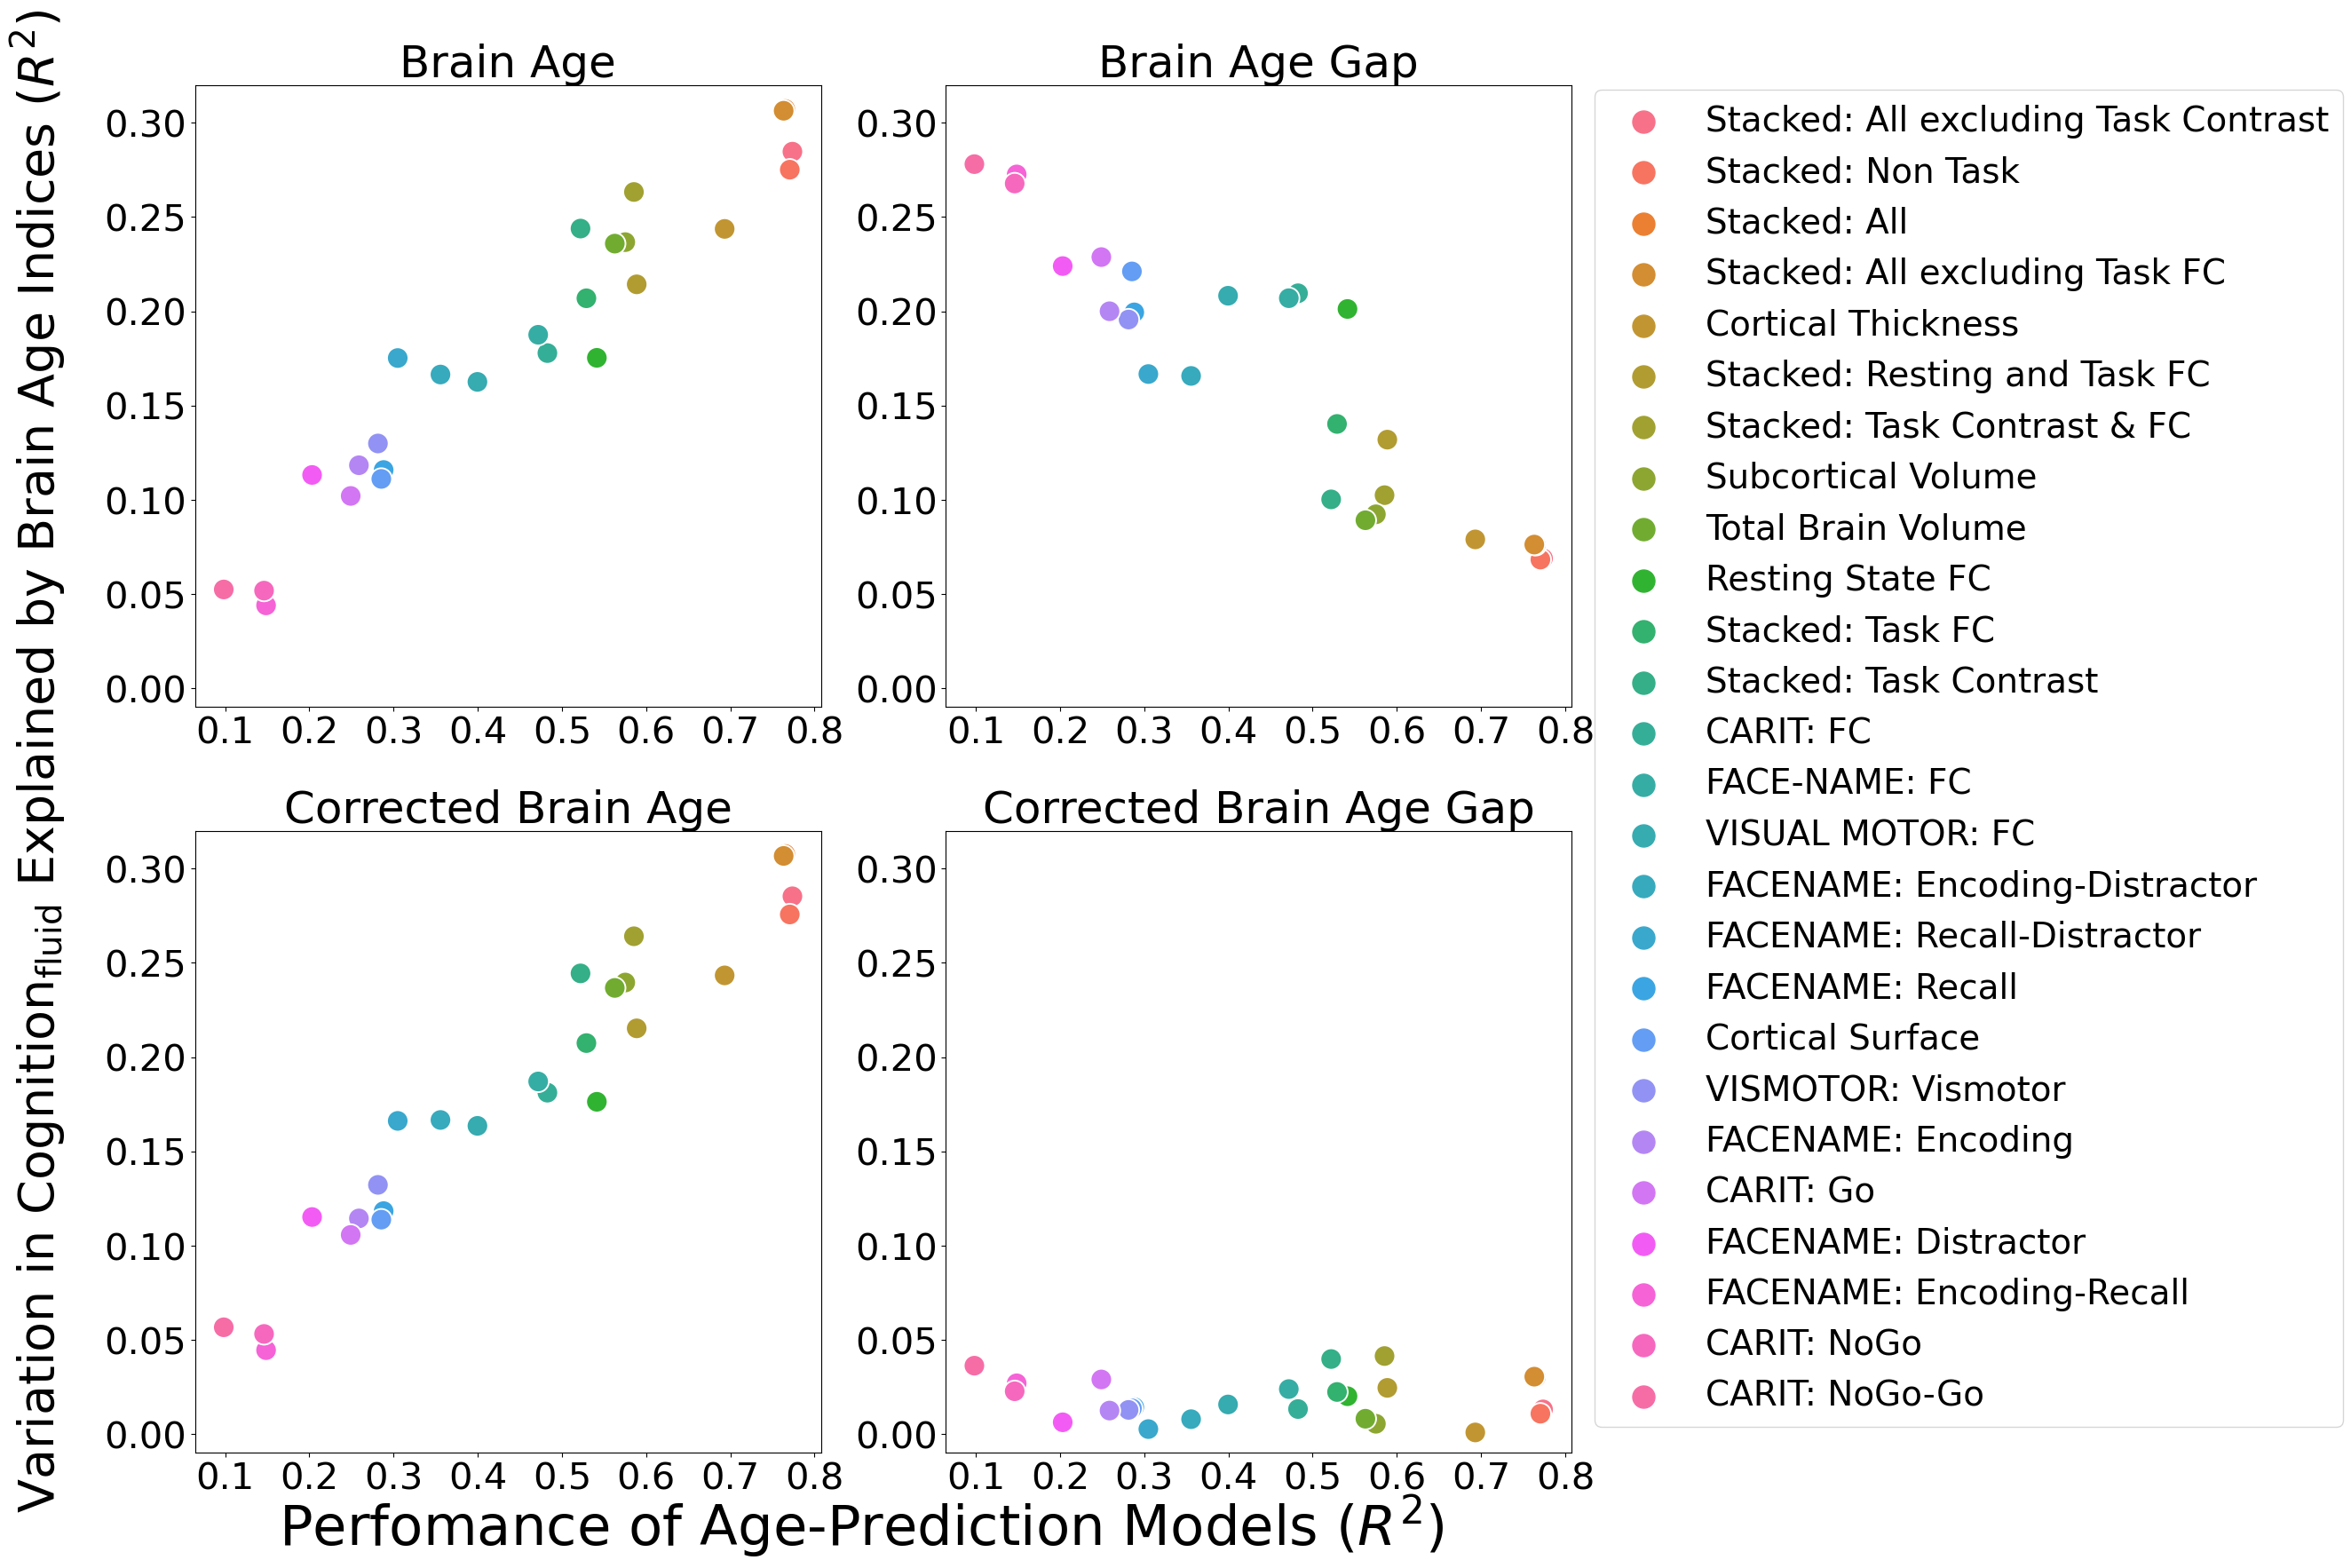

In [8]:

fig = plt.figure(figsize=(20,20))


data = df.reset_index().sort_values(by='r2_AGE_brain', ascending=False)


for col, header, num in zip(['r2_1_age_pred', 'r2_1_age_gap', 'r2_1_age_pred_cor', 'r2_1_age_gap_cor'], 
                            ['Brain Age', 'Brain Age Gap', 'Corrected Brain Age', 'Corrected Brain Age Gap'], 
                            [1, 2, 3, 4]):
    
    plt.subplot(2, 2, num)
    plt.title(header, fontsize=36)

    ax = sns.scatterplot(data =data, x = 'r2_AGE_brain', y = col, hue = 'index', s=300)

    plt.xlabel(' ')
    plt.ylabel(' ')

    plt.xticks( fontsize=30)
    plt.yticks( fontsize=30)
    
    plt.ylim((-0.01,0.32))
    if num == 2:
        ax.legend(bbox_to_anchor=(1.01, 1.02), markerscale=3, fontsize=28)
    else:
        ax.legend([],[], frameon=False)

#ax.legend(bbox_to_anchor=(1.01, 1.02), markerscale=2, fontsize=14)

fig.supxlabel('Perfomance of Age-Prediction Models ($R^2$)',fontsize=45, y=0.05)
fig.supylabel('Variation in $\mathregular{Cognition_{fluid}}$ Explained by Brain Age Indices ($R^2$)',fontsize=40)

plt.show()

In [9]:
#maximum r2 for Corrected Brain Age Gap
print('max r2 for Corrected Brain Age Gap')
print(df['r2_1_age_gap_cor'].sort_values(ascending=False).index[0], 
      df['r2_1_age_gap_cor'].sort_values(ascending=False)[0])

max r2 for Corrected Brain Age Gap
Stacked: Task Contrast & FC 0.0412613996340697


#### Plot variation in Cognitionfluid explained by Brain Age indices and Brain Cognition

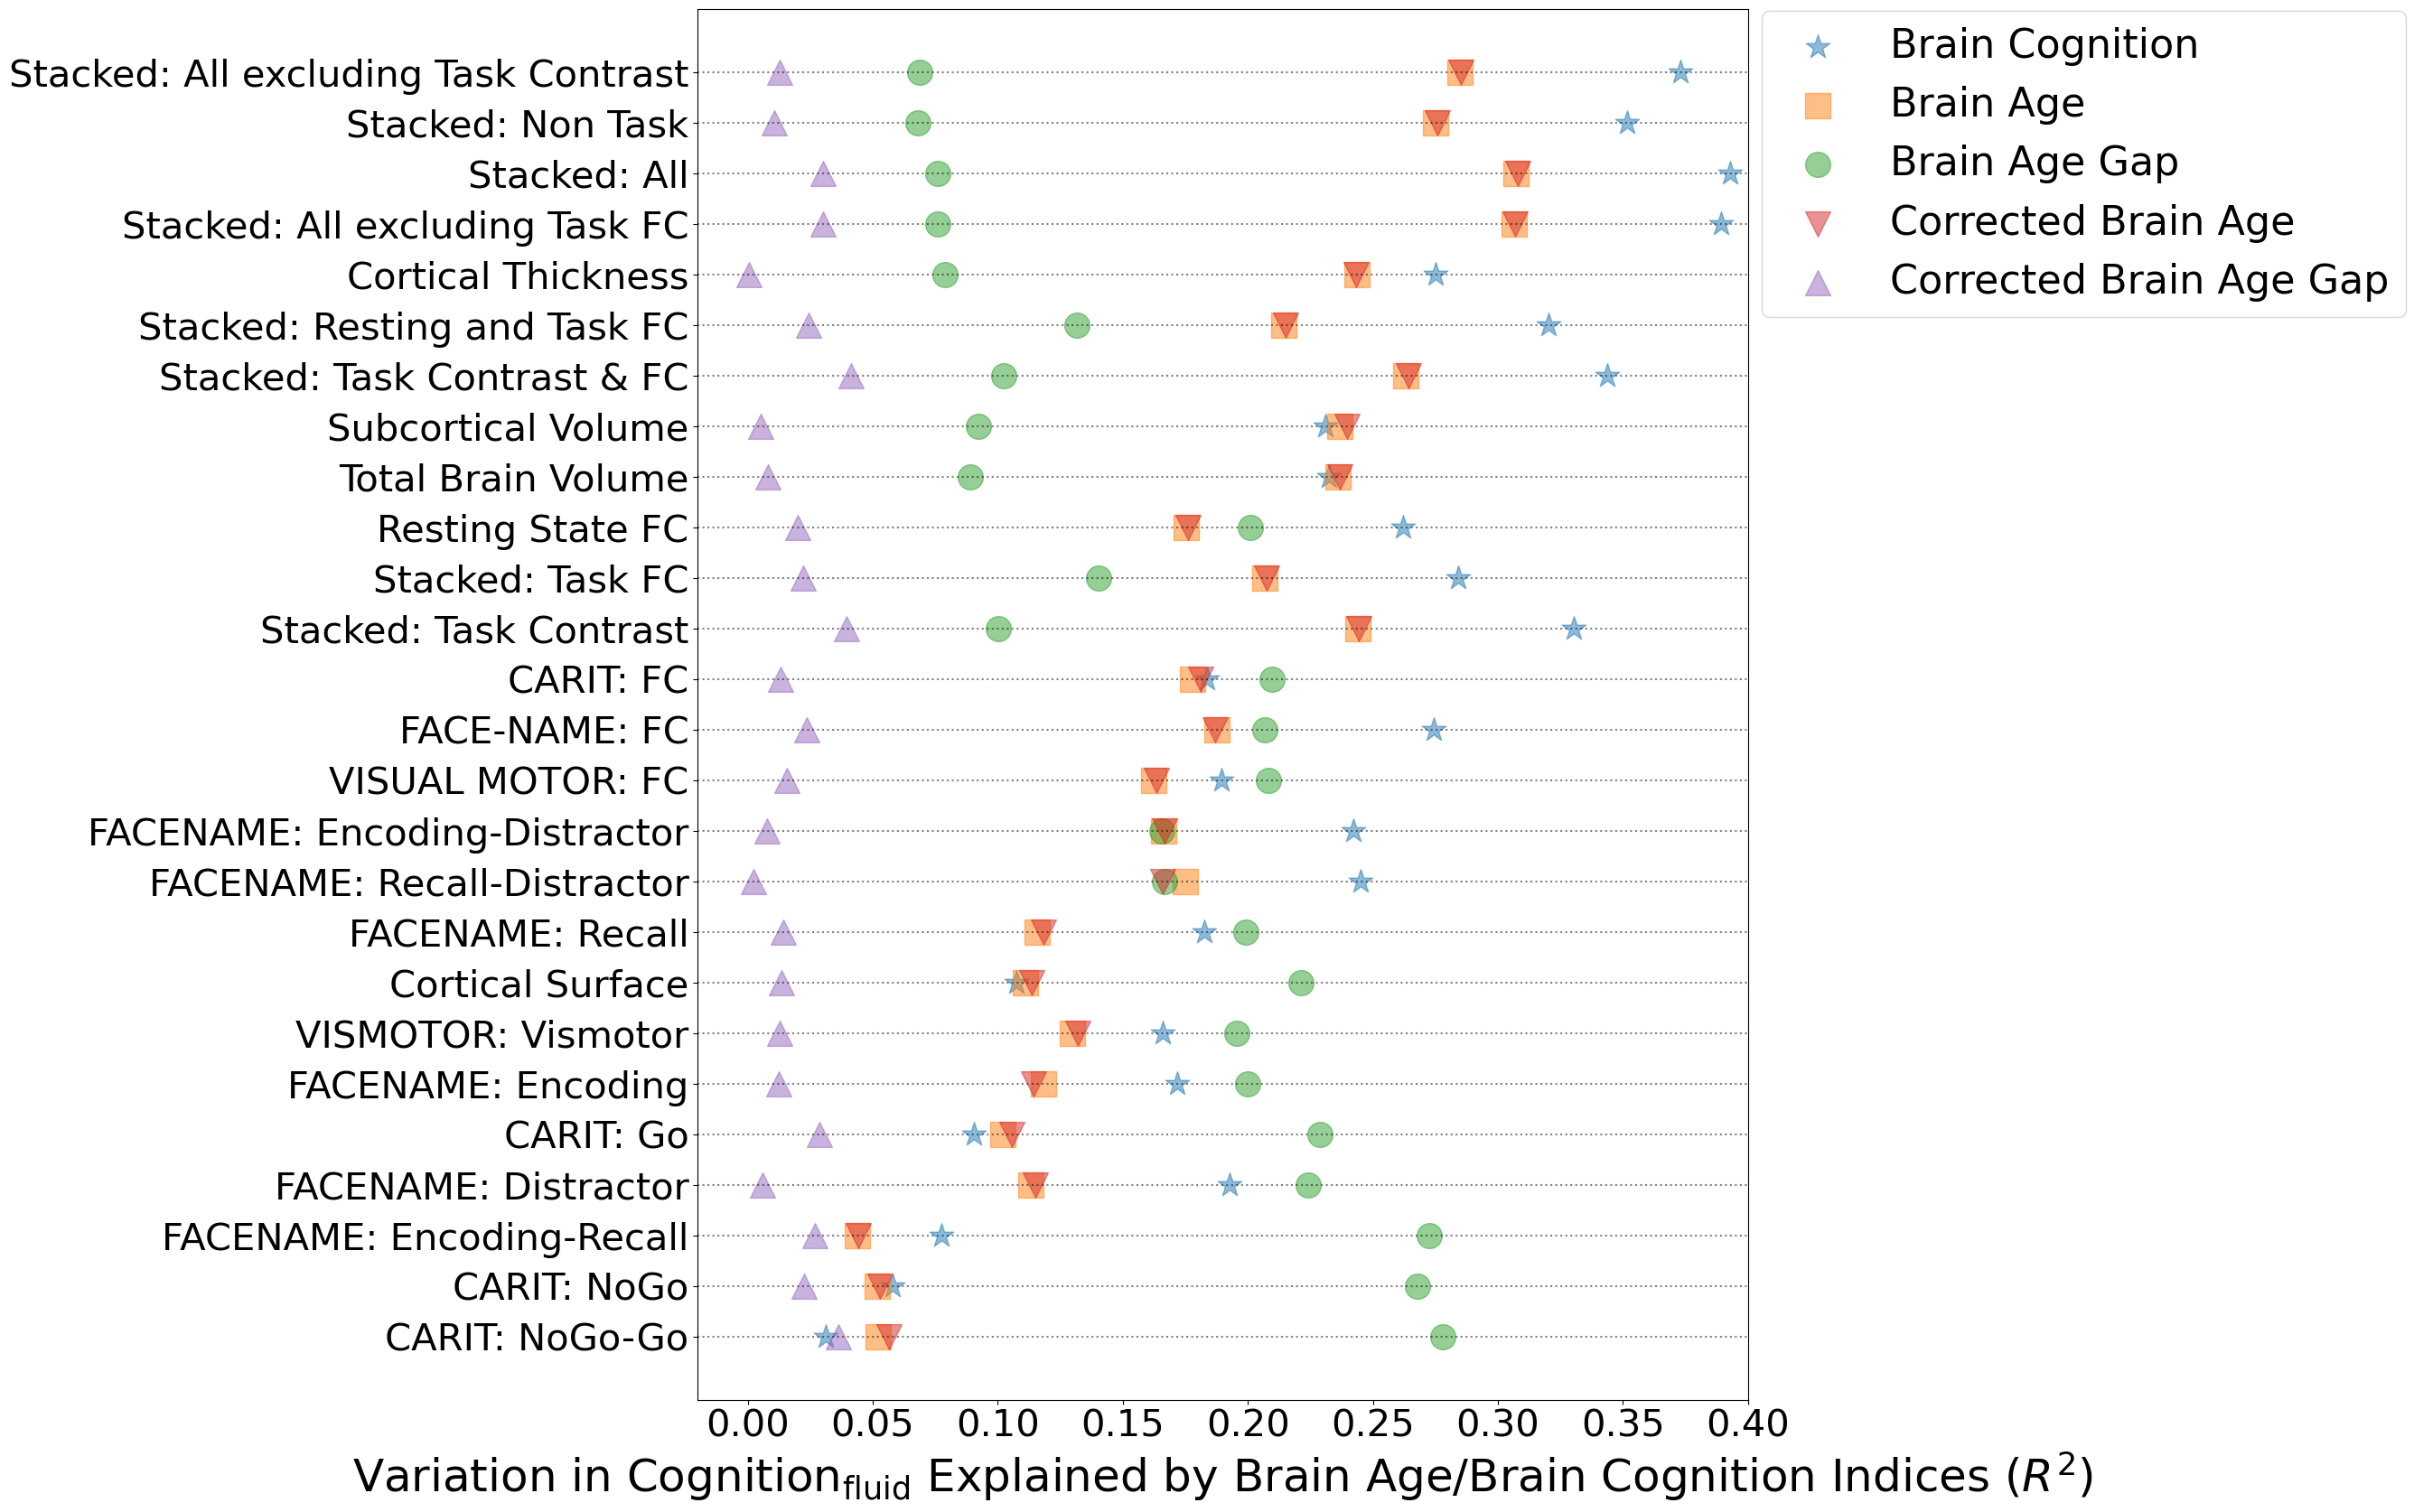

In [10]:
df_scatter = df[['r2_AGE_brain',
                 'r2_COG_brain', 
                 'r2_1_age_pred', 
                 'r2_1_age_gap', 
                 'r2_1_age_pred_cor', 
                 'r2_1_age_gap_cor']]

df_scatter = df_scatter.sort_values(by='r2_AGE_brain', ascending=True).reset_index()


fig = plt.figure(figsize=(15,20))

for col, labl, marker in zip(df_scatter.columns[2:], ['Brain Cognition', 
                                              'Brain Age', 
                                              'Brain Age Gap', 
                                              'Corrected Brain Age', 
                                              'Corrected Brain Age Gap'], ["*" , "," , "o" , "v" , "^" ]):
  
    plt.scatter(data=df_scatter, y='index', x = col, label=labl, s=400, alpha=.5, marker=marker)

for j in np.arange(0, len(df_scatter.index), 1):
    plt.hlines(y=j, xmin=-0.02, xmax=0.4, linestyles='dotted', color='black', alpha=.5)


plt.xlim((-0.02,0.4))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Variation in $\mathregular{Cognition_{fluid}}$ Explained by Brain Age/Brain Cognition Indices ($R^2$)', fontsize=36)
fig.legend(bbox_to_anchor=(1.4, 0.89), fontsize=32)
plt.show()

#### The scatter plots between observed and predicted values in the test sets from age-prediction models.

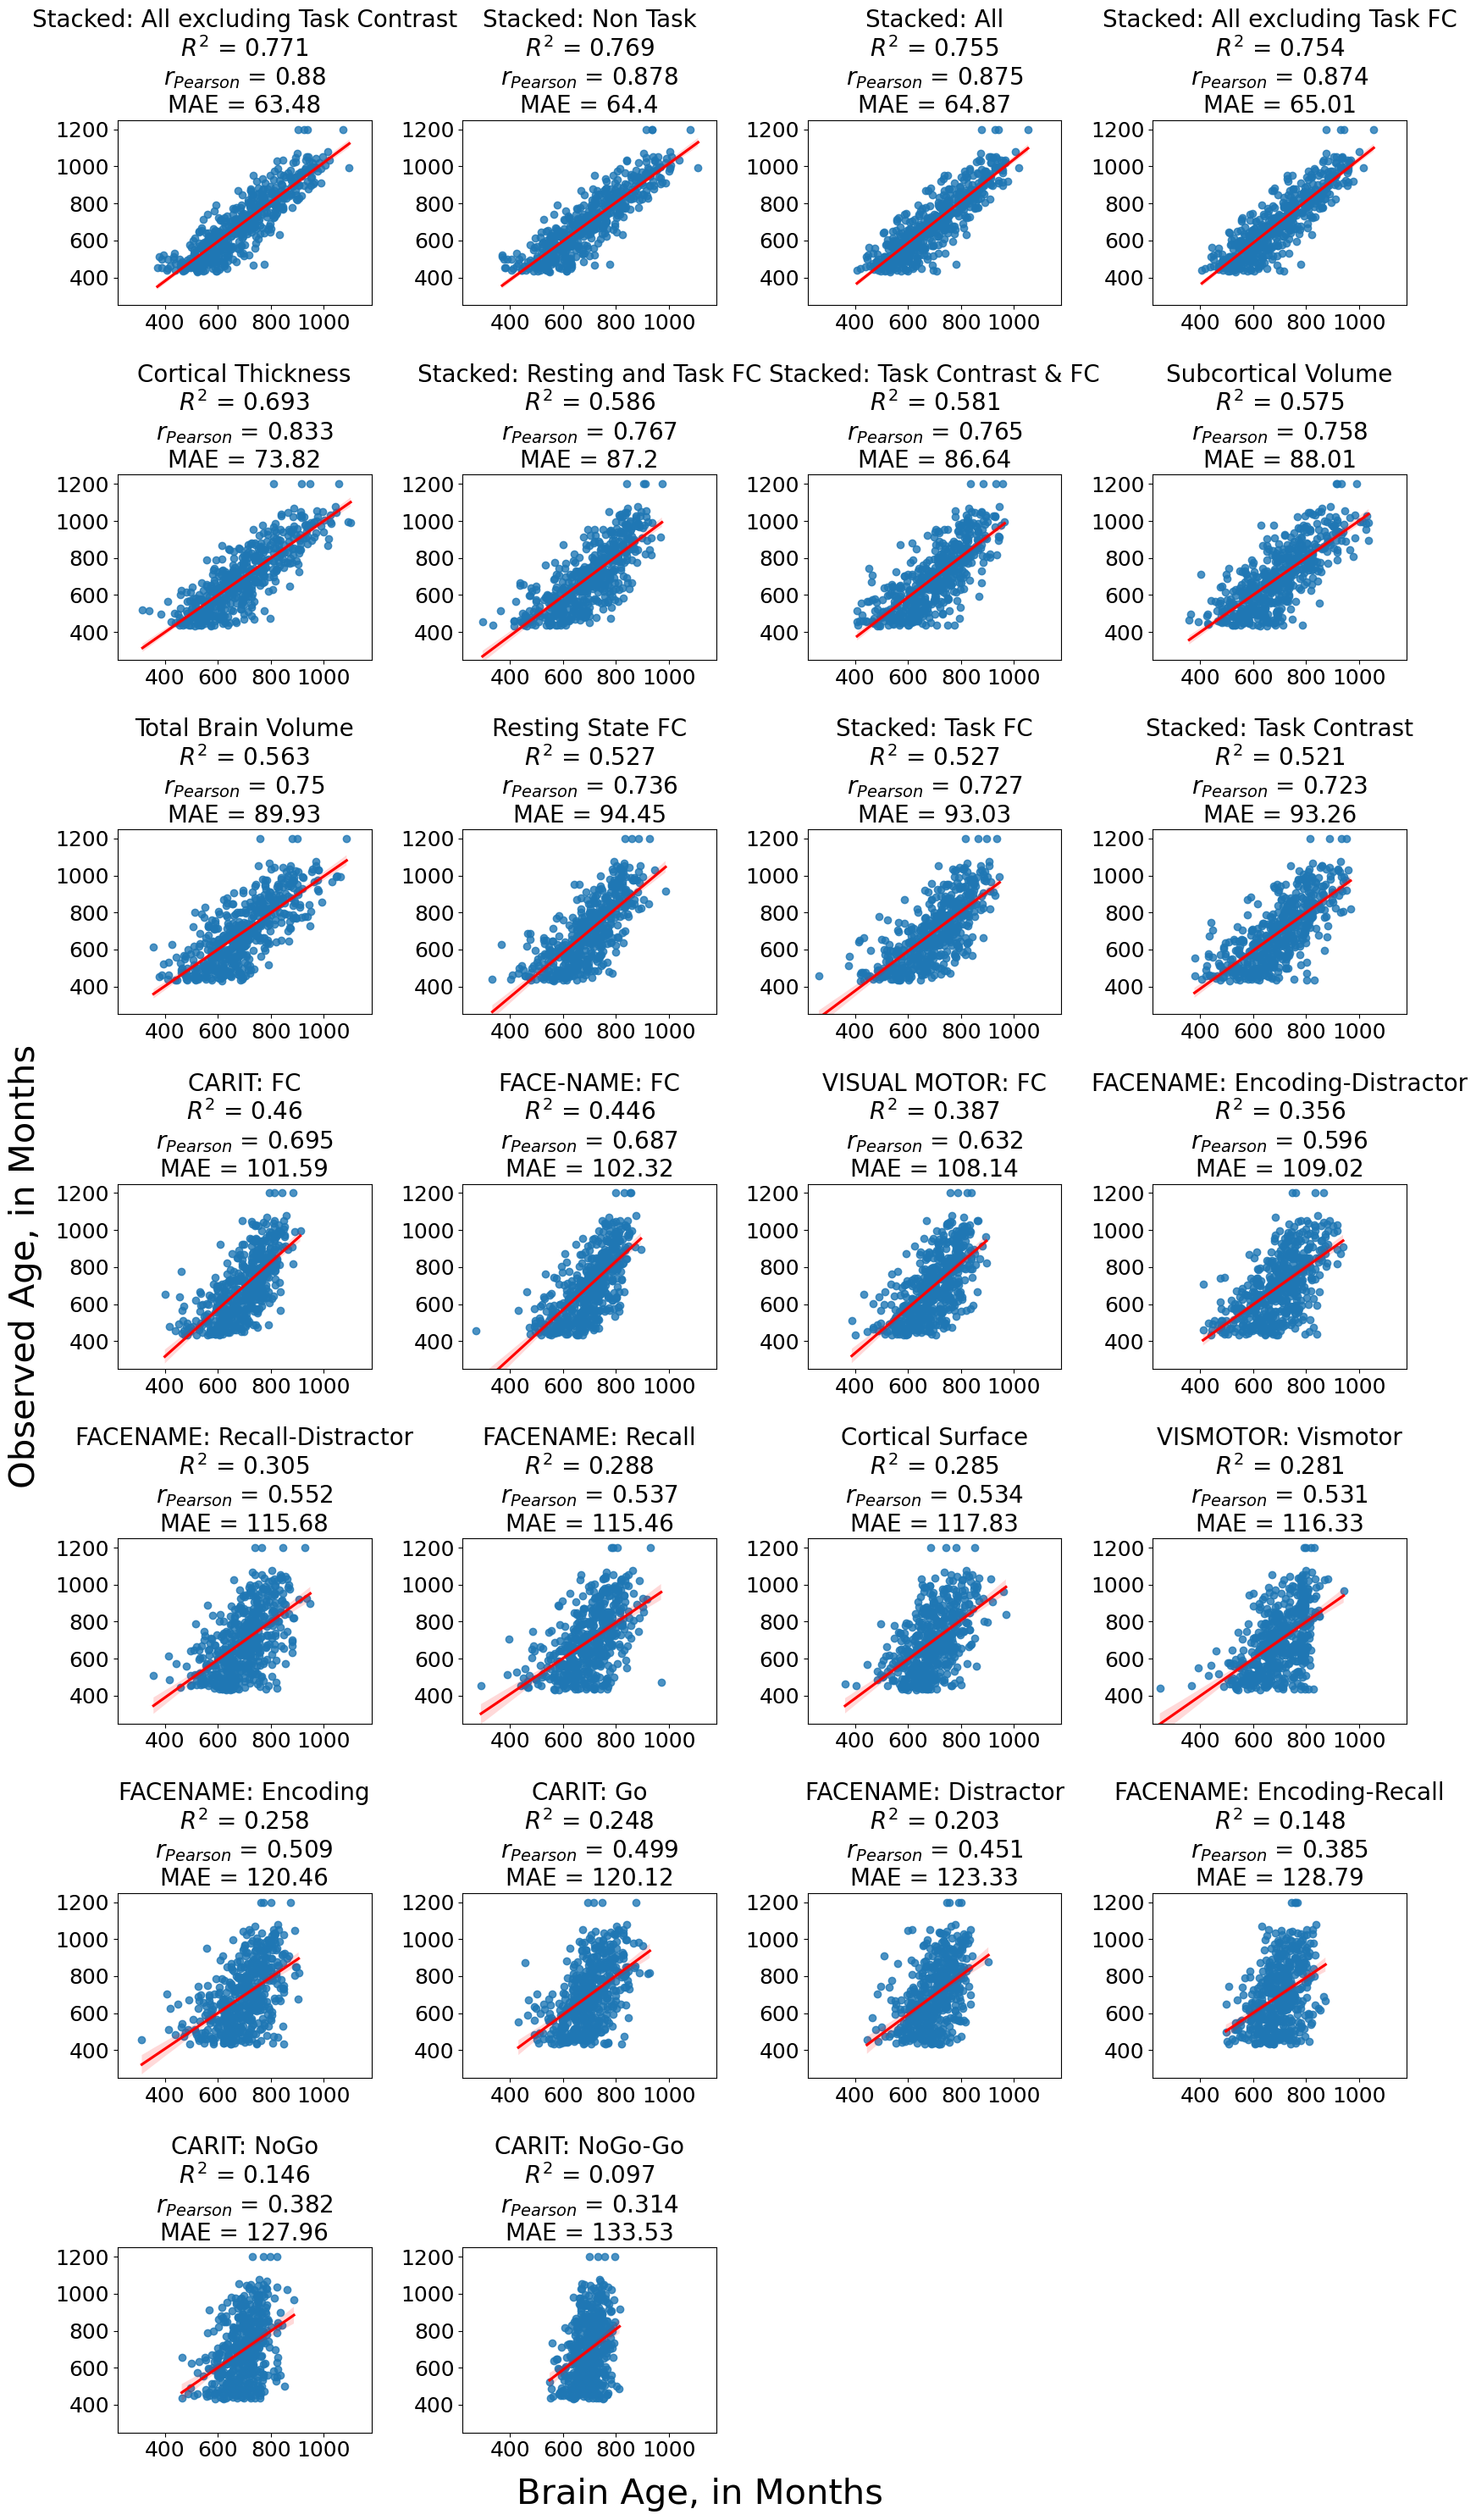

In [11]:
fig = plt.figure(figsize=(17,30))

data_age_scatter = df_age

for col, num in zip(df_scatter['index'].values[::-1], np.arange(1, len(df_age.columns[:-2])+1, 1) ):
    
    plt.subplot(7, 4, num)
    
    ind_r2 = r2_score(data_age_scatter['y_real'], data_age_scatter[col]).round(3)
    ind_mae = mean_absolute_error(data_age_scatter['y_real'], data_age_scatter[col]).round(2)
    ind_cor = pearsonr(data_age_scatter['y_real'], data_age_scatter[col])[0].round(3)

    
    plt.title(data_age_scatter[col].name+'\n$R^2$ = '+str(ind_r2)+'\n$r_{Pearson}$ = '+str(ind_cor)+'\nMAE = '+str(ind_mae)
              , fontsize=20)
    
    sns.regplot(data = data_age_scatter, y = 'y_real', x = col, line_kws={"color": "red"})
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim((220,1180))
    plt.ylim((250,1250))

fig.supxlabel('Brain Age, in Months', fontsize=30)    
fig.supylabel('Observed Age, in Months', fontsize=30)

fig.tight_layout()

plt.show()

#### The scatter plots between observed and predicted values in the test sets from cognition-prediction models

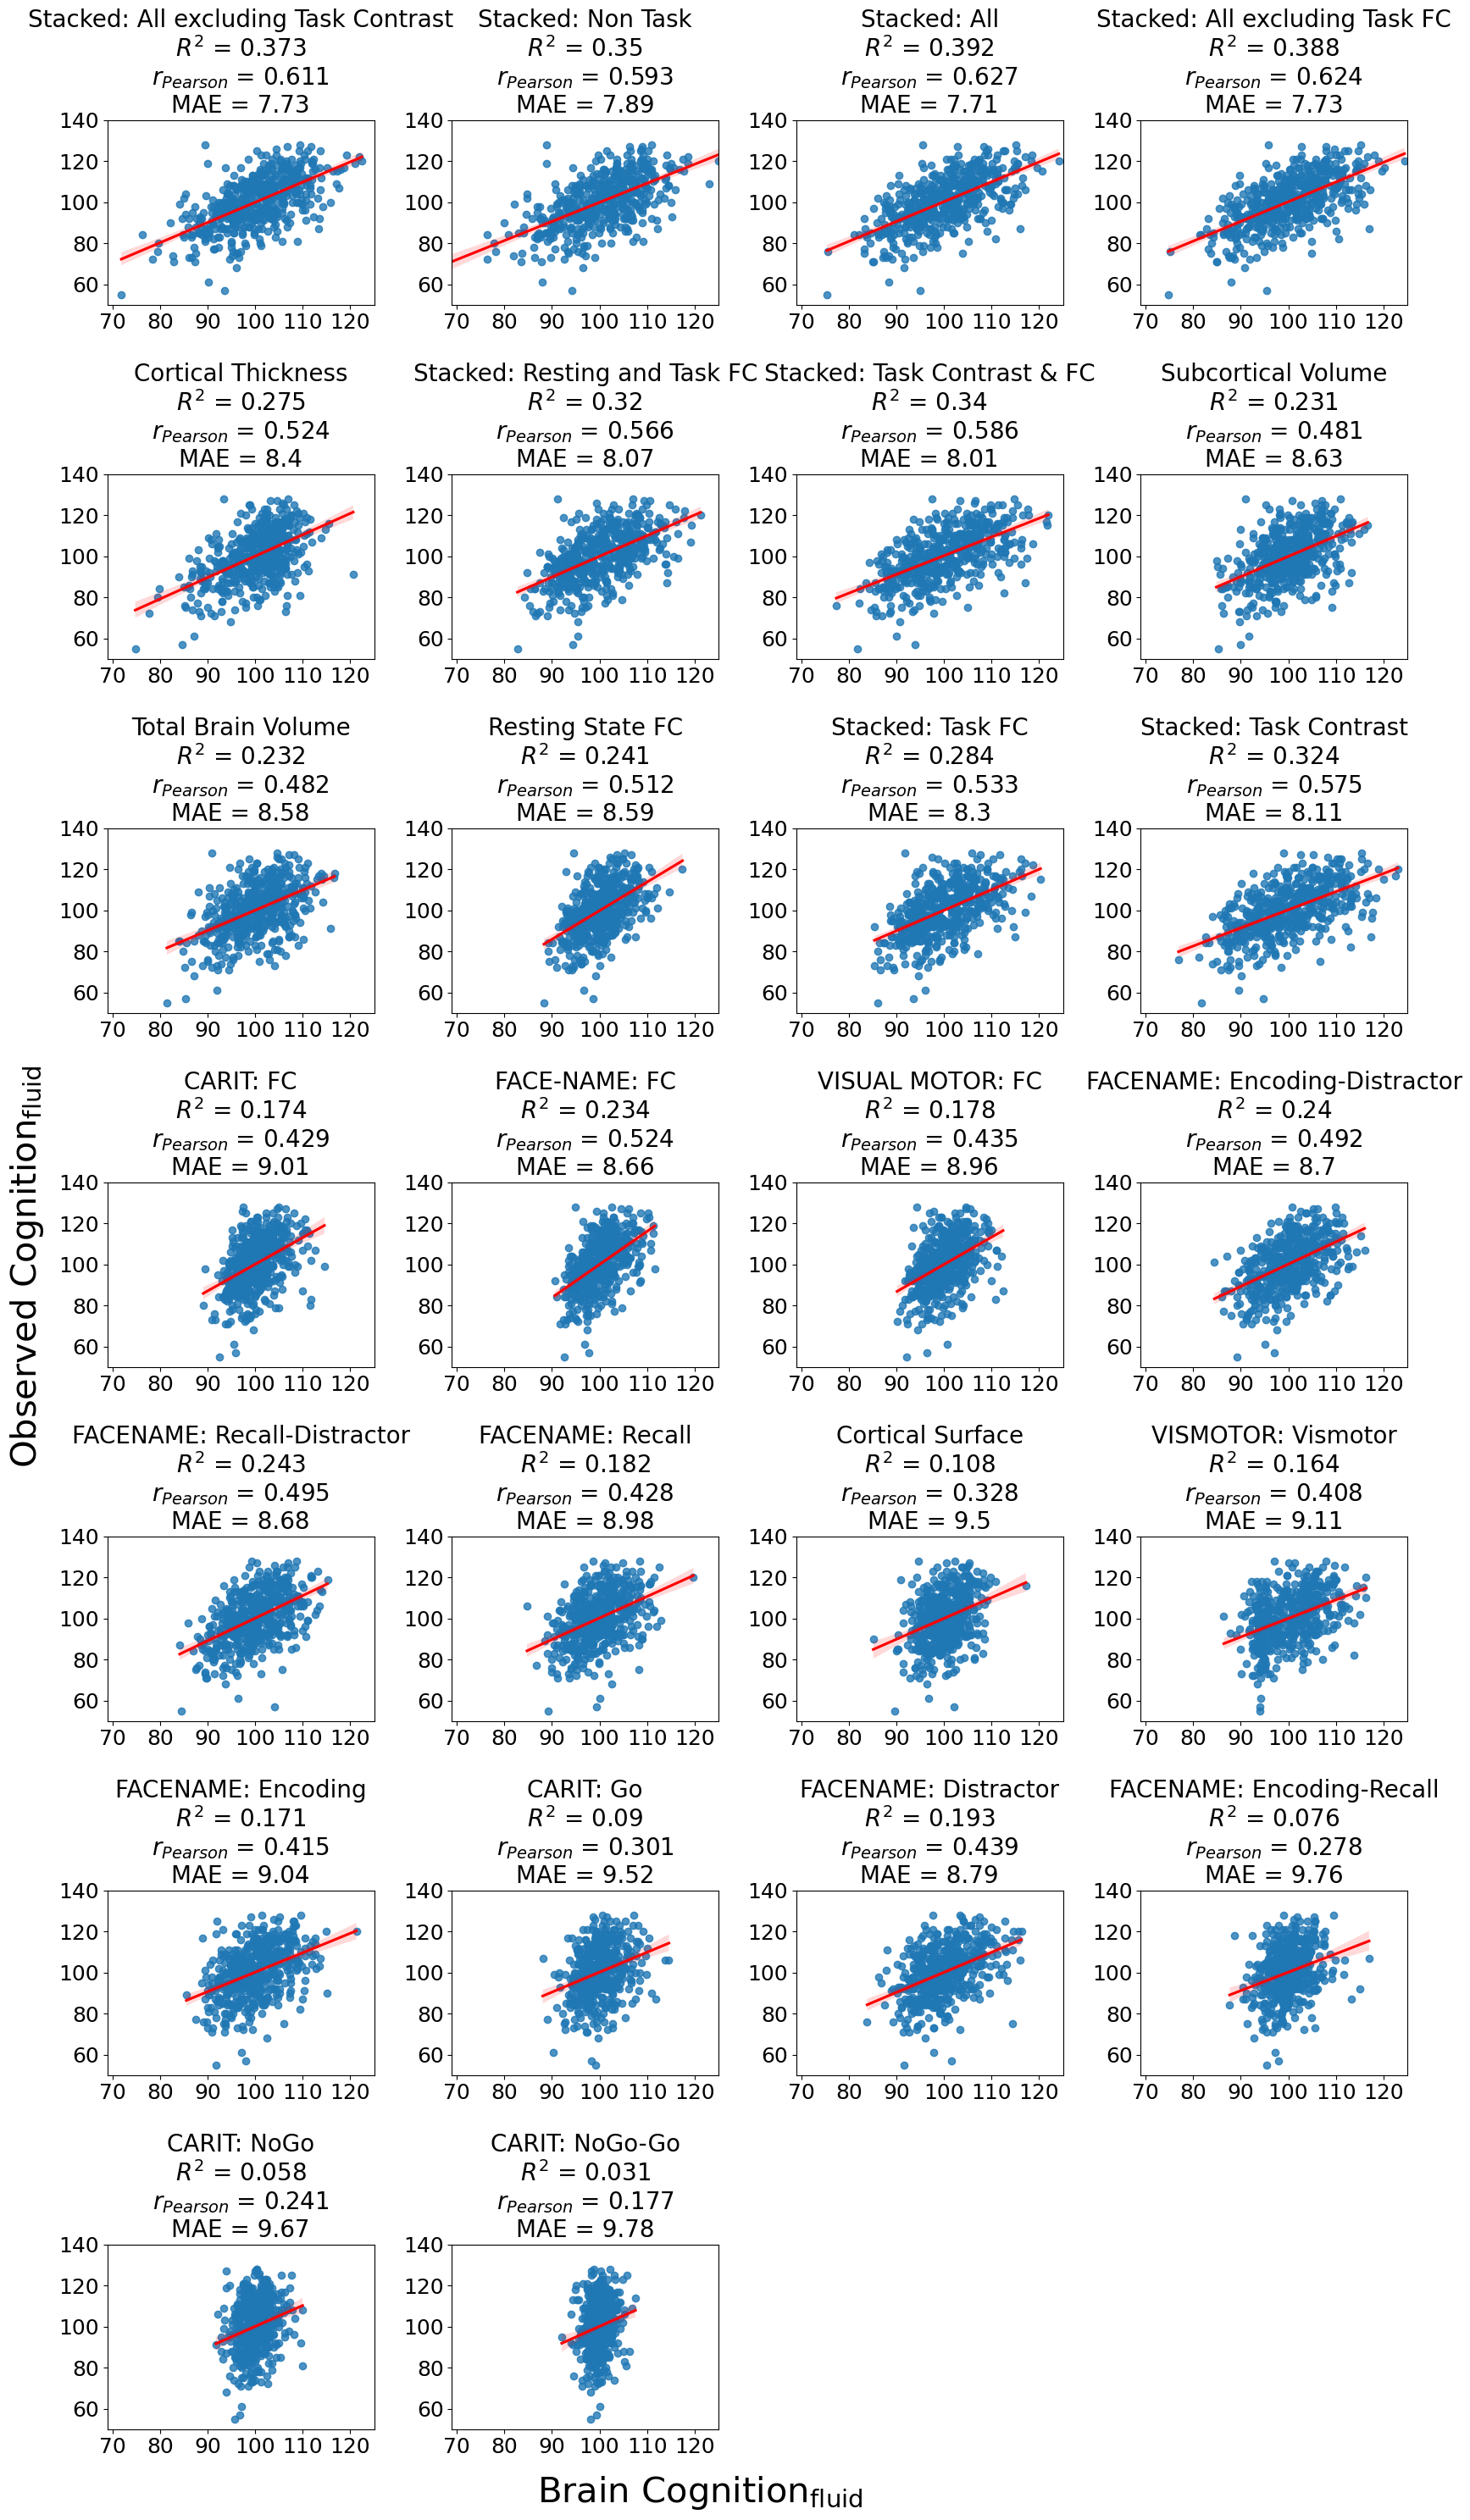

In [12]:
fig = plt.figure(figsize=(17,30))

data_cog_scatter = df_cog

for col, num in zip(df_scatter['index'].values[::-1], np.arange(1, len(df_cog.columns[:-2])+1, 1) ):
    
    plt.subplot(7, 4, num)
    
    ind_r2 = r2_score(data_cog_scatter['y_real'], data_cog_scatter[col]).round(3)
    ind_mae = mean_absolute_error(data_cog_scatter['y_real'], data_cog_scatter[col]).round(2)
    ind_cor = pearsonr(data_cog_scatter['y_real'], data_cog_scatter[col])[0].round(3)

    
    plt.title(data_cog_scatter[col].name+'\n$R^2$ = '+str(ind_r2)+'\n$r_{Pearson}$ = '+str(ind_cor)+'\nMAE = '+str(ind_mae)
              , fontsize=20)
    
    sns.regplot(data = data_cog_scatter, y = 'y_real', x = col, line_kws={"color": "red"})
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim((69,125))
    plt.ylim((50,140))

fig.supxlabel('Brain $\mathregular{Cognition_{fluid}}$', fontsize=30)    
fig.supylabel('Observed $\mathregular{Cognition_{fluid}}$', fontsize=30)

fig.tight_layout()

plt.show()

#### Relationship between chronological age and Cognitionfluid

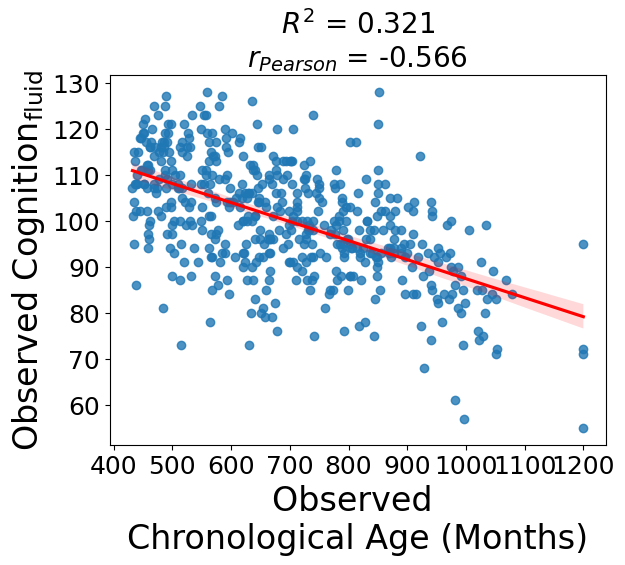

In [13]:
ind_r2 = get_r2(data_age_scatter['y_real'], data_cog_scatter['y_real']).round(3)
ind_cor = pearsonr(data_age_scatter['y_real'], data_cog_scatter['y_real'])[0].round(3)


plt.title('$R^2$ = '+str(ind_r2)+'\n$r_{Pearson}$ = '+str(ind_cor)
          , fontsize=20)

sns.regplot(x = data_age_scatter['y_real'], 
            y = data_cog_scatter['y_real'],  
            line_kws={"color": "red"})
plt.xlabel('Observed \nChronological Age (Months)', fontsize=24)
plt.ylabel('Observed $\mathregular{Cognition_{fluid}}$', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

#### Performance of Age-prediction Models

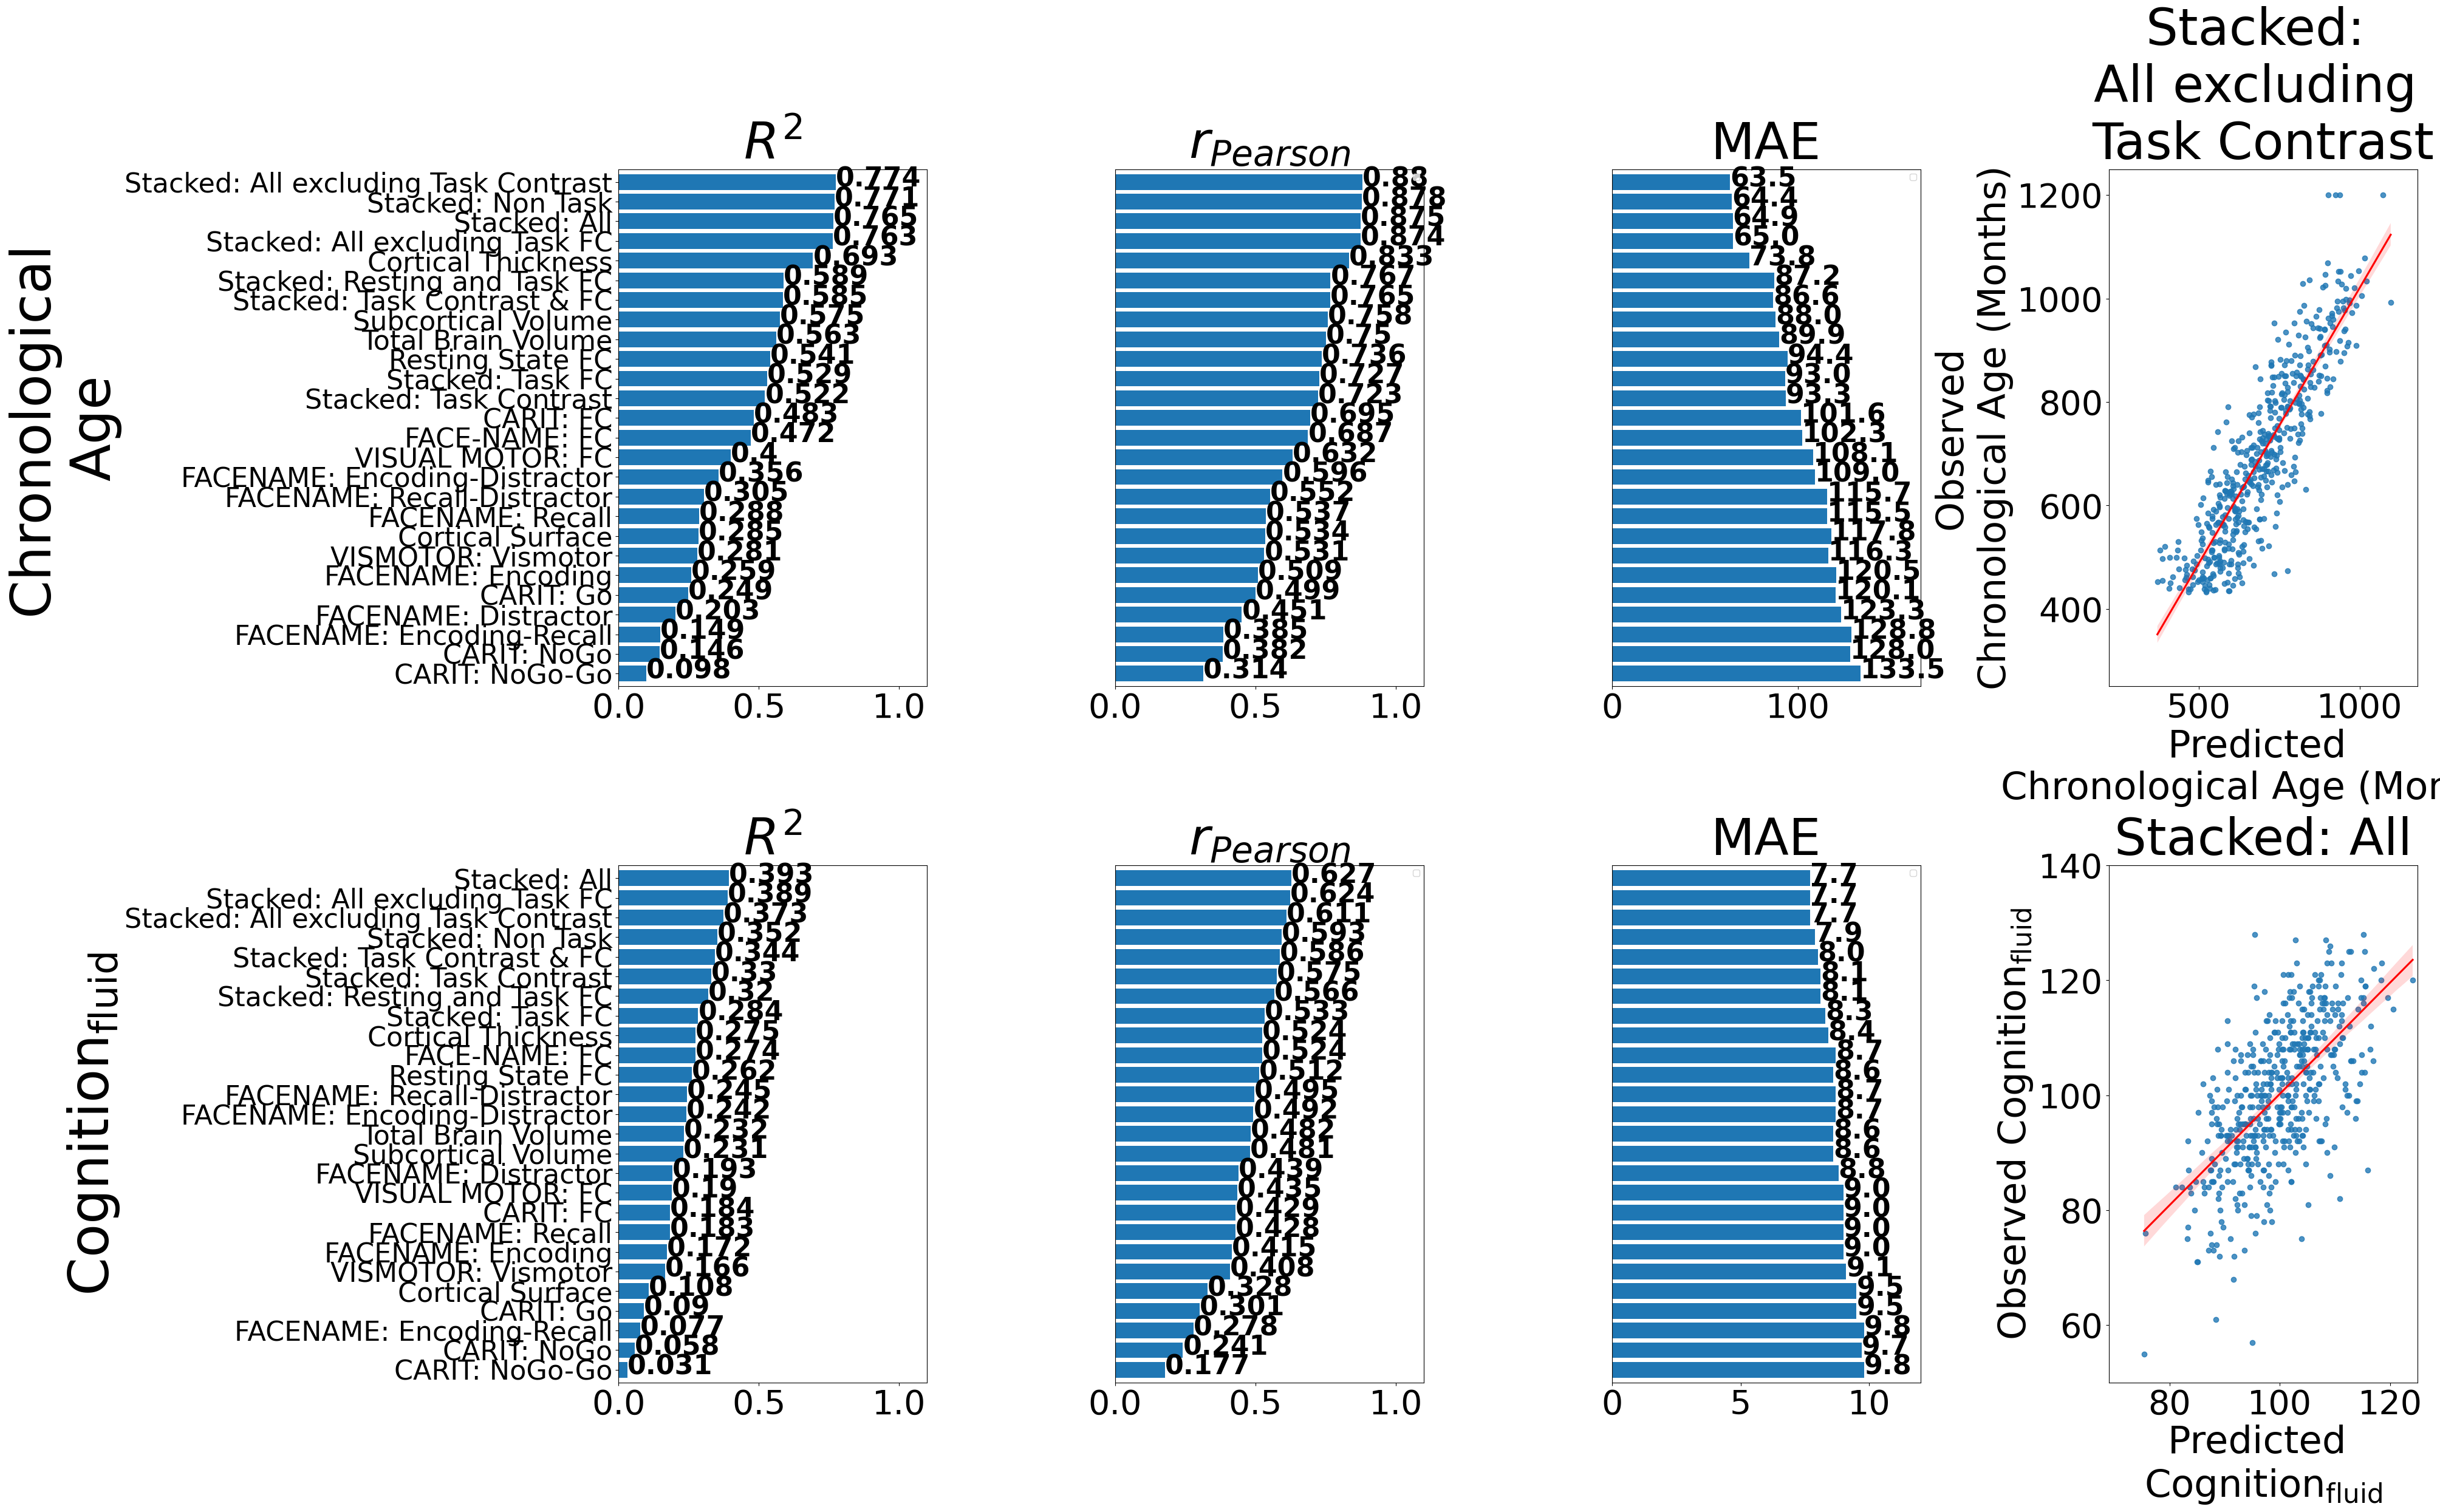

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4)

fig.set_size_inches(40, 25)

#1, 5
for col, num, title in zip(['r2_AGE_brain', 'r2_COG_brain'], 
                           [0,1], 
                           ['Chronological\nAge', '$\mathregular{Cognition_{fluid}}$']):
    
    #r2 plot
    ax1 = df.loc[ : , col].sort_values(ascending=True).plot.barh(width=0.8, 
                                                                 fontsize=32,
                                                                 ax=axes[num,0])      
    for i in ax1.patches:

        ax1.text(i.get_x()+i.get_width(), i.get_y()+0.15,
                 str(round((i.get_width()), 3)),
                 fontsize=32, fontweight='bold')#,color=cc)
    ax1.set_xlim((0,1.1))
    ax1.set_title('$R^2$', fontsize=60)
    ax1.set_ylabel(title, fontsize=65,rotation=90) 
    ax1.tick_params(axis='x', labelsize=40)

#2-3, 6-7

j=0
for datafrm in [df_age, df_cog]:
    
    if j == 0:
        Col = 'r2_AGE_brain'
        num = 0
        title = 'Age'
    else:
        Col = 'r2_COG_brain'
        num = 1
        title = '$\mathregular{Cognition_{fluid}}$'        
    
    dct_cor = {}
    dct_mae = {}
    for col in datafrm.columns[:-2]:
        dct_cor[col] = pearsonr(datafrm['y_real'], datafrm[col])[0].round(3)
        dct_mae[col] = mean_absolute_error(datafrm['y_real'], datafrm[col]).round(1)

    df_fig_cor = pd.DataFrame({'R':dct_cor}).reindex(index=df.loc[ : , Col].sort_values(ascending=True).index)
    df_fig_mae = pd.DataFrame({'MAE':dct_mae}).reindex(index=df.loc[ : , Col].sort_values(ascending=True).index)
    
    #correlation plot
    ax2 = df_fig_cor.plot.barh(width=0.8,
                               fontsize=32,
                               ax=axes[num,1])
    for i in ax2.patches:

        ax2.text(i.get_x()+i.get_width(), i.get_y()+0.15,
                 str(round((i.get_width()), 3)),
                 fontsize=32, fontweight='bold')#, color=cc)    
    ax2.set_title('$r_{Pearson}$', fontsize=60)
    ax2.set_yticks([])
    ax2.set_xlim((0,1.1))
    ax2.legend([])
    ax2.tick_params(axis='x', labelsize=40)
    
    #mae plot
    ax3 = df_fig_mae.plot.barh(width=0.8,
                               fontsize=32,
                               ax=axes[num,2])
    for i in ax3.patches:

        ax3.text(i.get_x()+i.get_width(), i.get_y()+0.15,
                 str(round((i.get_width()), 3)),
                 fontsize=32, fontweight='bold')#,color=cc)
    ax3.set_title('MAE', fontsize=60)
    ax3.set_yticks([])
    ax3.legend([])
    if title == 'Age':
        ax3.set_xlim((0,166))
    else:
        ax3.set_xlim((0,12))
    ax3.tick_params(axis='x', labelsize=40)
    
    j+=1

#4, 8


ax4 = sns.regplot(data = df_age, y = 'y_real', x = 'Stacked: All excluding Task Contrast', 
                  line_kws={"color": "red"}, 
                  ax=axes[0,3])

ax4.set_xlabel('Predicted \nChronological Age (Months)', fontsize=45)
ax4.set_ylabel('Observed  \nChronological Age (Months)', fontsize=45)
ax4.tick_params(axis='x', labelsize=40)
ax4.tick_params(axis='y', labelsize=40)
ax4.set_xlim((220,1180))
ax4.set_ylim((250,1250))
ax4.set_title('Stacked: \nAll excluding \nTask Contrast', fontsize=60)


ax5 = sns.regplot(data = df_cog, y = 'y_real', x = 'Stacked: All', 
                  line_kws={"color": "red"}, 
                  ax=axes[1,3])

ax5.set_xlabel('Predicted \n$\mathregular{Cognition_{fluid}}$', fontsize=45)
ax5.set_ylabel('Observed $\mathregular{Cognition_{fluid}}$', fontsize=45)
ax5.tick_params(axis='x', labelsize=40)
ax5.tick_params(axis='y', labelsize=40)
ax5.set_xlim((69,125))
ax5.set_ylim((50,140))    
ax5.set_title('Stacked: All', fontsize=60)






fig.tight_layout()

plt.show()

### Commonality analysis plots

In [15]:
#create tables for plotting

df_r2 = df[['r2_2_age_pred+age-orig','r2_2_age_gap+age-orig', 
            'r2_2_age_pred_cor+age-orig', 'r2_2_age_gap_cor+age-orig',

            'r2_3_age_pred+age+cog-pred', 'r2_3_age_gap+age+cog-pred', 
            'r2_3_age_pred_cor+age+cog-pred', 'r2_3_age_gap_cor+age+cog-pred']]


In [16]:
#calculate statistical significance of ΔR2 for 2 regressors

dct_d_r2_12 = {}
for ttype in['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor']:
    
    dctf = {}
    for ind in df_r2.index:

        N = len(df_age.index) #number of observation
        k2 = 2                #number of regressors
        Rchange = df_r2.loc[ind,'r2_2_'+ttype+'+age-orig'] - df_age_orig_r2['r2'] #delta R, increase in R2 when having an additional regressor
        kchange = 1           #difference between the number of regressors
        R2_2 = df_r2.loc[ind,'r2_2_'+ttype+'+age-orig']

        F = ((N-k2-1)*Rchange ) / (kchange*(1 - R2_2))  #F-ratio

        dctf[ind] = F
    dct_d_r2_12[ttype] = pd.Series(dctf)
df_d_r2_12 = pd.DataFrame(dct_d_r2_12)   #assemble all F's into dataframe

#calculate threshold
dfn= kchange
dfd = N-k2-1
pval1 = f.ppf(0.95, dfn, dfd) #95% threshold

In [17]:
#print threshold value for 2 regressors
print(pval1)

3.860086650062891


In [18]:
#calculate statistical significance of ΔR2 for 3 regressors

dct_d_r2_23 = {}
for ttype in['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor']:

    dctf = {}
    for ind in df_r2.index:

        N = len(df_age.index) #number of observation
        k2 = 3                #number of regressors
        Rchange = df_r2.loc[ind,'r2_3_age_pred+age+cog-pred'] - df_r2.loc[ind,'r2_2_age_pred+age-orig'] #delta R, increase in R2 when having an additional regressor
        kchange = 1           #difference between the number of regressors
        R2_2 = df_r2.loc[ind,'r2_3_age_pred+age+cog-pred']

        F = ((N-k2-1)*Rchange ) / (kchange*(1 - R2_2)) #F-ratio

        dctf[ind] = F
    dct_d_r2_23[ttype] = pd.Series(dctf)
df_d_r2_23 = pd.DataFrame(dct_d_r2_23)   #assemble all F's into dataframe 

#calculate threshold
dfn= kchange
dfd = N-k2-1
pval2 = f.ppf(0.95, dfn, dfd) #95% threshold

In [19]:
#print threshold value for 3 regressors
print(pval2)

3.8601240397378507


In [20]:
#apply threshold to table as mask, 2 regressors

df_d_r2_12_nn = copy.deepcopy(df_d_r2_12)
df_d_r2_12_nn[df_d_r2_12_nn<pval1] =0
display(df_d_r2_12_nn)

age_pred    age_gap  age_pred_cor  \
CARIT: NoGo-Go                         0.000000   0.000000      0.000000   
CARIT: Go                              0.000000   0.000000      0.000000   
CARIT: NoGo                            0.000000   0.000000      0.000000   
FACENAME: Encoding                     0.000000   0.000000      0.000000   
FACENAME: Recall                       0.000000   0.000000      0.000000   
FACENAME: Distractor                   6.114999   6.058929      6.477443   
FACENAME: Encoding-Recall              0.000000   0.000000      0.000000   
FACENAME: Encoding-Distractor          5.639843   5.611249      5.125568   
FACENAME: Recall-Distractor           12.140533  12.161795      8.744276   
VISMOTOR: Vismotor                     0.000000   0.000000      0.000000   
CARIT: FC                              0.000000   0.000000      0.000000   
FACE-NAME: FC                          0.000000   0.000000      0.000000   
VISUAL MOTOR: FC                       0.000000   0.000000      0.000000   
Cortical Thickness                     0.000000   0.000000      0.000000   
Cortical Surface                       0.000000   0.000000      0.000000   
Subcortical Volume                     5.673686   5.643834      5.966540   
Total Brain Volume                     6.279980   6.320888      6.304600   
Resting State FC                       0.000000   0.000000      0.000000   
Stacked: All                          11.042082  11.088535     11.106207   
Stacked: Task Contrast                11.197917  11.259983     11.153043   
Stacked: Non Task                      0.000000   0.000000      0.000000   
Stacked: Task FC                       0.000000   0.000000      0.000000   
Stacked: Task Contrast & FC           11.375256  11.477628     11.450572   
Stacked: All excluding Task FC        10.892375  10.934443     10.940140   
Stacked: All excluding Task Contrast   3.907955   4.006204      3.968645   
Stacked: Resting and Task FC           0.000000   0.000000      0.000000   

                                      age_gap_cor  
CARIT: NoGo-Go                           0.000000  
CARIT: Go                                0.000000  
CARIT: NoGo                              0.000000  
FACENAME: Encoding                       0.000000  
FACENAME: Recall                         0.000000  
FACENAME: Distractor                     6.477179  
FACENAME: Encoding-Recall                0.000000  
FACENAME: Encoding-Distractor            5.064515  
FACENAME: Recall-Distractor              8.527489  
VISMOTOR: Vismotor                       0.000000  
CARIT: FC                                0.000000  
FACE-NAME: FC                            0.000000  
VISUAL MOTOR: FC                         0.000000  
Cortical Thickness                       0.000000  
Cortical Surface                         0.000000  
Subcortical Volume                       5.976738  
Total Brain Volume                       6.337565  
Resting State FC                         0.000000  
Stacked: All                            11.170816  
Stacked: Task Contrast                  11.248377  
Stacked: Non Task                        0.000000  
Stacked: Task FC                         0.000000  
Stacked: Task Contrast & FC             11.535364  
Stacked: All excluding Task FC          10.977255  
Stacked: All excluding Task Contrast     4.106530  
Stacked: Resting and Task FC             0.000000

In [21]:
#apply threshold to table as mask, 3 regressors

df_d_r2_23_nn = copy.deepcopy(df_d_r2_23)
df_d_r2_23_nn[df_d_r2_23_nn<pval1] =0
display(df_d_r2_23_nn)

age_pred     age_gap  age_pred_cor  \
CARIT: NoGo-Go                          0.000000    0.000000      0.000000   
CARIT: Go                               4.611025    4.611025      4.611025   
CARIT: NoGo                             6.309672    6.309672      6.309672   
FACENAME: Encoding                     37.043281   37.043281     37.043281   
FACENAME: Recall                       49.271989   49.271989     49.271989   
FACENAME: Distractor                   58.543016   58.543016     58.543016   
FACENAME: Encoding-Recall              18.045360   18.045360     18.045360   
FACENAME: Encoding-Distractor          63.098519   63.098519     63.098519   
FACENAME: Recall-Distractor            60.197601   60.197601     60.197601   
VISMOTOR: Vismotor                     38.939422   38.939422     38.939422   
CARIT: FC                              12.378131   12.378131     12.378131   
FACE-NAME: FC                          73.055661   73.055661     73.055661   
VISUAL MOTOR: FC                       18.304548   18.304548     18.304548   
Cortical Thickness                     25.306642   25.306642     25.306642   
Cortical Surface                       12.077371   12.077371     12.077371   
Subcortical Volume                      6.448389    6.448389      6.448389   
Total Brain Volume                      0.000000    0.000000      0.000000   
Resting State FC                       80.967379   80.967379     80.967379   
Stacked: All                          108.368458  108.368458    108.368458   
Stacked: Task Contrast                 90.802205   90.802205     90.802205   
Stacked: Non Task                      73.305372   73.305372     73.305372   
Stacked: Task FC                       64.466589   64.466589     64.466589   
Stacked: Task Contrast & FC            94.243408   94.243408     94.243408   
Stacked: All excluding Task FC        104.424724  104.424724    104.424724   
Stacked: All excluding Task Contrast   87.301027   87.301027     87.301027   
Stacked: Resting and Task FC          101.589611  101.589611    101.589611   

                                      age_gap_cor  
CARIT: NoGo-Go                           0.000000  
CARIT: Go                                4.611025  
CARIT: NoGo                              6.309672  
FACENAME: Encoding                      37.043281  
FACENAME: Recall                        49.271989  
FACENAME: Distractor                    58.543016  
FACENAME: Encoding-Recall               18.045360  
FACENAME: Encoding-Distractor           63.098519  
FACENAME: Recall-Distractor             60.197601  
VISMOTOR: Vismotor                      38.939422  
CARIT: FC                               12.378131  
FACE-NAME: FC                           73.055661  
VISUAL MOTOR: FC                        18.304548  
Cortical Thickness                      25.306642  
Cortical Surface                        12.077371  
Subcortical Volume                       6.448389  
Total Brain Volume                       0.000000  
Resting State FC                        80.967379  
Stacked: All                           108.368458  
Stacked: Task Contrast                  90.802205  
Stacked: Non Task                       73.305372  
Stacked: Task FC                        64.466589  
Stacked: Task Contrast & FC             94.243408  
Stacked: All excluding Task FC         104.424724  
Stacked: All excluding Task Contrast    87.301027  
Stacked: Resting and Task FC           101.589611

#### Commonality analysis of a multiple regression model, 2 regressors

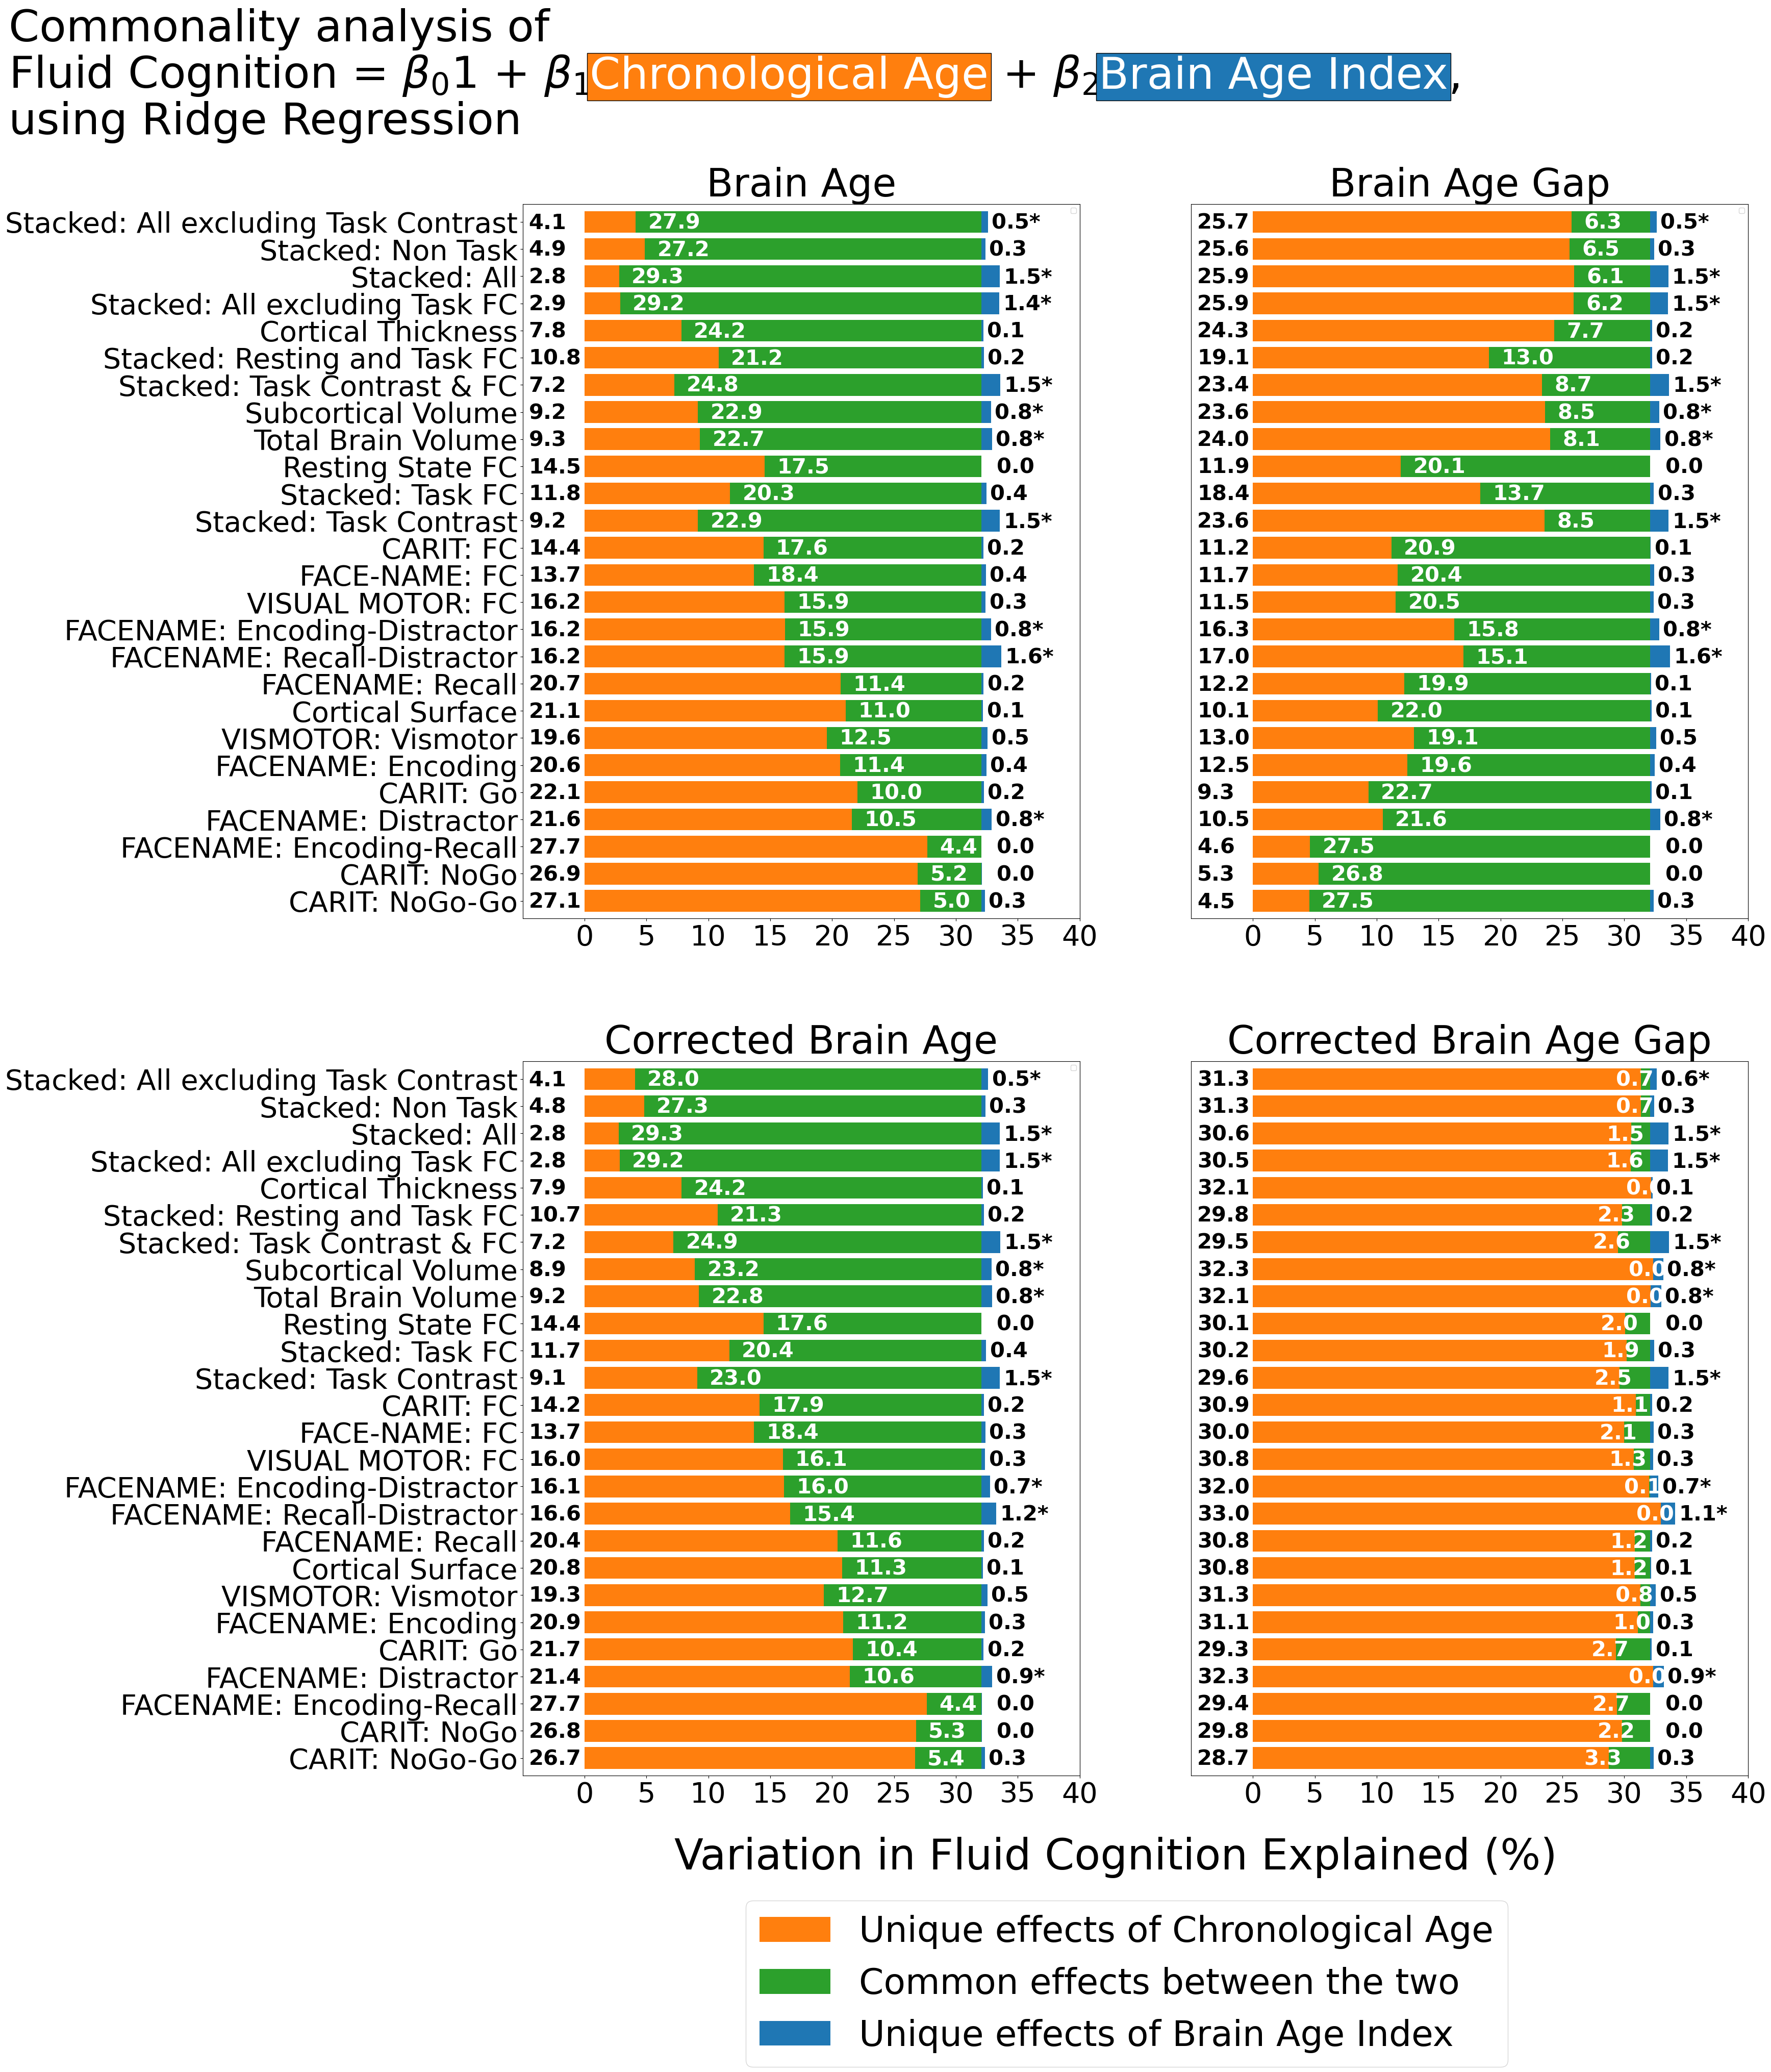

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(40, 40)

for ttype, num, title, num1, num2 in zip(['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor'],
                      [0, 1, 2, 3],
                      ['Brain Age', 
                       'Brain Age Gap', 
                       'Corrected Brain Age', 
                       'Corrected Brain Age Gap'],
                        [0,0,1,1],
                        [0,1,0,1]):
    
    table  = df.loc[ df_scatter['index'].values, 
                    ['U_2_age-orig_('+ttype+')', 'C_2_'+ttype+'+age-orig','U_2_'+ttype, ]]
    
    table[table<0] = 0
    table = table*100
    
    table2 = df_d_r2_12_nn.reindex(index=table.index)

    
    ax1 = table.plot.barh(width=0.8,
                     stacked=True, 
                     figsize=(31,40), 
                     fontsize=40,
                     ax=axes[num1,num2], color=['#ff7f0e', '#2ca02c', '#1f77b4'])
    #set title
    ax1.set_title(title, fontsize=55)
    
    #set bar number text
    
    if num == 3:
        j=0
        coord = pd.Series(table2.index,
                          index=np.arange(52,52+len(ax1.patches[52:]),1))
        
        for i in ax1.patches:
            if j<26:
                xm = -4.5
                cc ='black'
                rnd = 1
                xtxt = str(round((i.get_width()), rnd))
            
            elif 26<=j<52:
                #xm =  i.get_x()-3
                cc ='white'
                rnd = 1
                xtxt = str(round((i.get_width()), rnd))
                if round((i.get_width()), rnd)==0.0:
                    xm = ax1.patches[j-26].get_x()+ax1.patches[j-26].get_width()-2
                else:
                    xm = i.get_x()-2
                    
            else:
                if round((i.get_width()), rnd) == 0 :
                    xm = 33+0.3
                else:
                    xm = i.get_x()+i.get_width()+0.3
                cc ='black'
                rnd = 1
                #xtxt = str(round((i.get_width()), rnd))
                if table2.loc[coord[j], ttype]!=0 :
                    xtxt = str(round((i.get_width()), rnd))+'*'    
                else:
                    xtxt = str(round((i.get_width()), rnd))
            

            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
            j+=1
        
    else:
        j=0
        coord = pd.Series(table2.index,
                          index=np.arange(52,52+len(ax1.patches[52:]),1))
        for i in ax1.patches:
            if j<26:
                xm = -4.5
                cc ='black'
                rnd = 1
                xtxt = str(round((i.get_width()), rnd))
            elif 26<=j<52:
                xm = i.get_x()+1#
                cc ='white'
                rnd = 1 
                xtxt = str(round((i.get_width()), rnd))
            else:
                if round((i.get_width()), rnd) == 0 :
                    xm = 33+0.3
                else:
                    xm = i.get_x()+i.get_width()+0.3
                cc ='black'
                rnd = 1
                
                if table2.loc[coord[j], ttype]!=0 :
                    xtxt = str(round((i.get_width()), rnd))+'*'    
                else:
                    xtxt = str(round((i.get_width()), rnd))

            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
            j+=1
    
    #set legend position
    if num ==3:
        ax1.legend(['Unique effects of Chronological Age', 'Common effects between the two', 'Unique effects of Brain Age Index'],
                   bbox_to_anchor=(0.6, -0.15), 
                   fontsize=50, ncol=1)  
    else:
        ax1.legend([])
    
    
    #set Y ticks 
    if num == 1:
        ax1.set_yticks([])
    elif num == 3:
        ax1.set_yticks([])
    
            
    ax1.set_xlim((-4.99,40))    
        
        
#fig.tight_layout()
#fig.suptitle('Commonality analysis of\n $Cognition_{fluid}$ = $\u03B2_{0}$1 + $\u03B2_{1}$Brain Age Index + $\u03B2_{2}$Age', 
#             fontsize=60)
sx = 'Commonality analysis of\nFluid Cognition = $\u03B2_{0}$1 + $\u03B2_{1}$<Chronological Age> + $\u03B2_{2}$<Brain Age Index>,\nusing Ridge Regression'

highlight_textprops = [{"bbox": {"facecolor": "#ff7f0e"}, "color":'w'}, 
                       {"bbox": {"facecolor": "#1f77b4"}, "color":'w'}]
fig_text(x=-0.2, y=0.91, va='bottom', s=sx,  highlight_textprops= highlight_textprops, fontsize=62)

fig.supxlabel('Variation in Fluid Cognition Explained (%)', fontsize=60, y=0.06)

plt.show()

#### Commonality analysis of a multiple regression model, 3 regressors

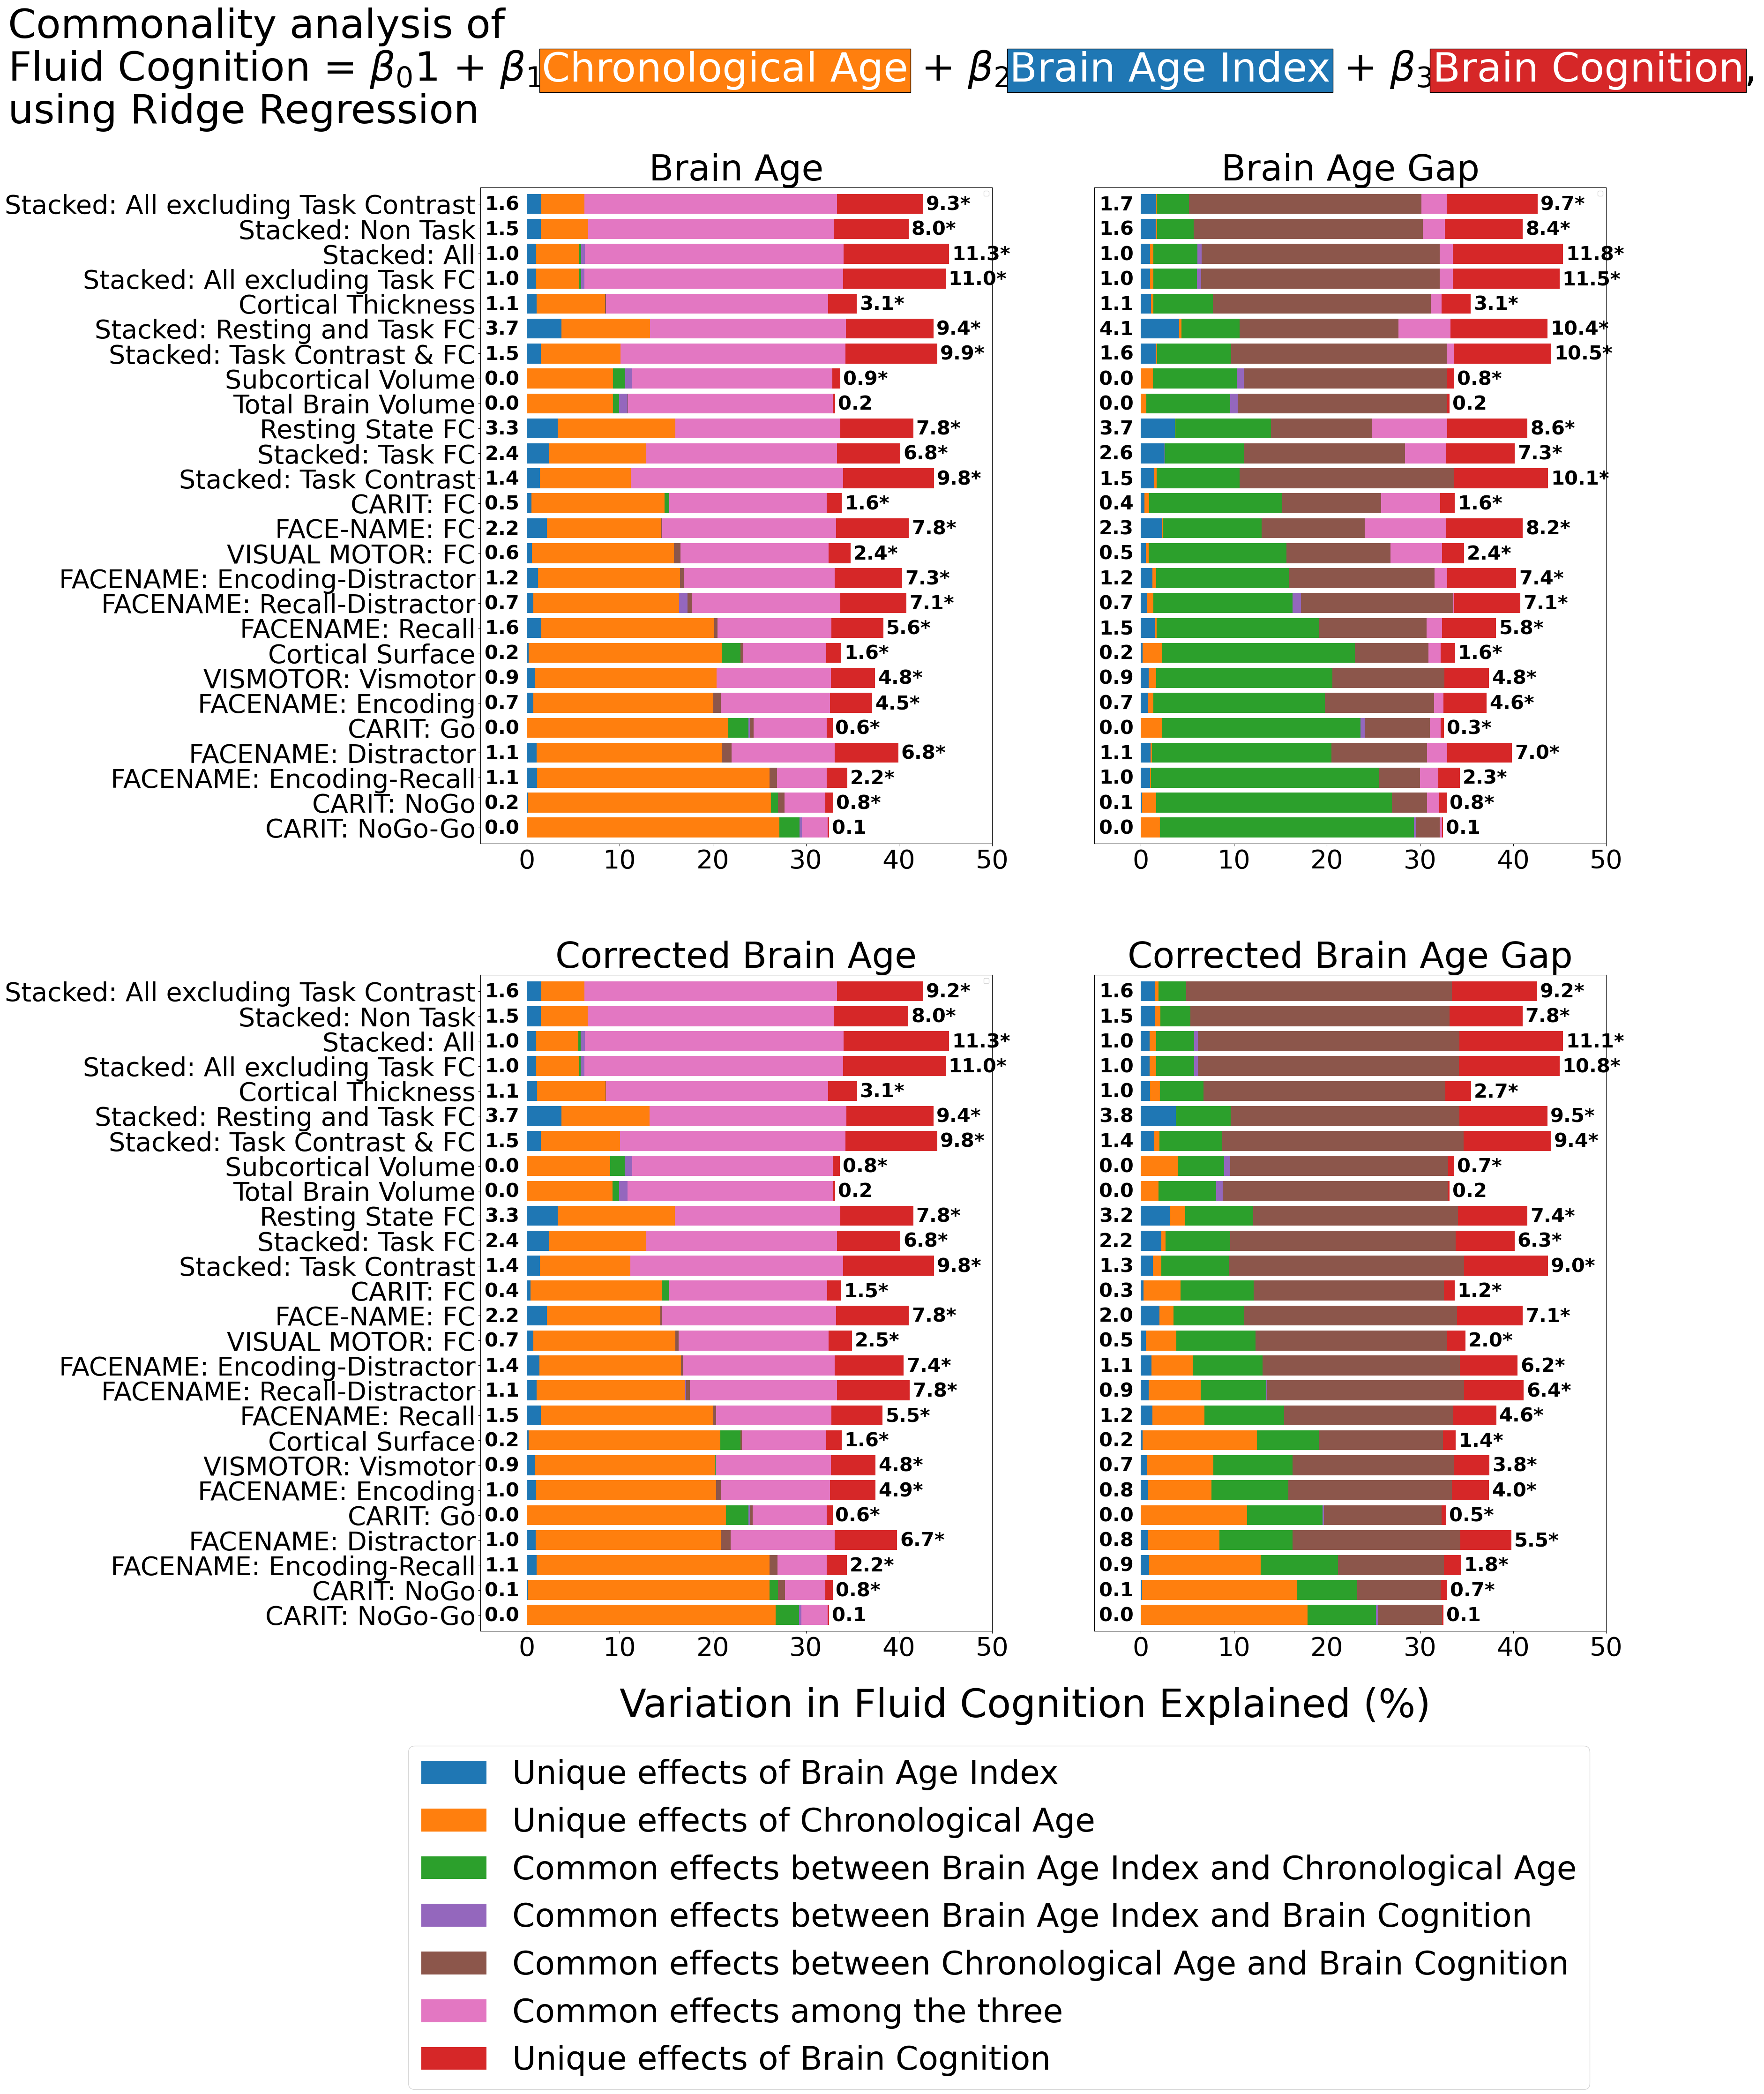

In [26]:

fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(40, 40)

for ttype, num, title, num1, num2 in zip(['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor'],
                      [0, 1, 2, 3],
                      ['Brain Age', 
                       'Brain Age Gap', 
                       'Corrected Brain Age', 
                       'Corrected Brain Age Gap'],
                        [0,0,1,1],
                        [0,1,0,1]):
    
    
    proc_df = df.loc[ df_scatter['index'].values, ['r2_3_'+ttype+'+age+cog-pred',
                         'U_3_'+ttype,
                         'U_3_age-orig_('+ttype+')',
                         
                         'C_3_2_'+ttype+'+age-orig',
                         'C_3_2_'+ttype+'+cog-pred',
                         'C_3_2_age-orig+cog-pred_('+ttype+')',
                         'C_3_'+ttype+'+age+cog-pred',
                         'U_3_cog-pred_('+ttype+')',]]

    proc_df[proc_df < 0] = 0

    for ind in proc_df.index:
        sums = proc_df.loc[ind, proc_df.columns[1:]].sum()
        for col in proc_df.columns[1:]:
            proc_df.loc[ind, col] = (proc_df.loc[ind, col]/sums)*proc_df.loc[ind, 'r2_3_'+ttype+'+age+cog-pred']  

    proc_df = proc_df.drop('r2_3_'+ttype+'+age+cog-pred', axis=1)

    proc_df = proc_df*100

    
    table = proc_df
    

    table2 = df_d_r2_23_nn.reindex(index=table.index)
    
    
    ax1 = table.plot.barh(width=0.8,
                     stacked=True, 
                     figsize=(31,40), 
                     fontsize=40,
                     ax=axes[num1,num2],
                     color=['#1f77b4', '#ff7f0e',  '#2ca02c', '#9467bd', '#8c564b', '#e377c2','#d62728',])
    #set title
    ax1.set_title(title, fontsize=55)
    
    #set bar number text
    j=0
    coord = pd.Series(table2.index,
                      index=np.arange(156,156+len(ax1.patches[156:]),1))
    for i in ax1.patches:
        if j<26:
            xm = -4.5
            cc ='black'
            rnd = 1
            xtxt = str(round((i.get_width()), rnd)) 
            
            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
        if j>=156:
            xm = i.get_x()+i.get_width()+0.3
            cc ='black'
            rnd = 1
            if table2.loc[coord[j], ttype]!=0 :
                xtxt = str(round((i.get_width()), rnd))+'*'    
            else:
                xtxt = str(round((i.get_width()), rnd))

            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
        j+=1
    
    
    
    #set legend position
    if num ==3:
        ax1.legend(['Unique effects of Brain Age Index', 
                    'Unique effects of Chronological Age',
                    'Common effects between Brain Age Index and Chronological Age',
                    'Common effects between Brain Age Index and Brain Cognition',
                    'Common effects between Chronological Age and Brain Cognition',
                    'Common effects among the three',
                    'Unique effects of Brain Cognition'],
                   bbox_to_anchor=(1, -0.15), 
                   fontsize=50, ncol=1)  
    else:
        ax1.legend([])
    
    
    #set Y ticks 
    if num == 1:
        ax1.set_yticks([])
    elif num == 3:
        ax1.set_yticks([])
    
            
    ax1.set_xlim((-4.99,50))    
        
        
#fig.tight_layout()
sx = 'Commonality analysis of\nFluid Cognition = $\u03B2_{0}$1 + $\u03B2_{1}$<Chronological Age> + $\u03B2_{2}$<Brain Age Index> + $\u03B2_{3}$<Brain Cognition>,\nusing Ridge Regression'

highlight_textprops = [{"bbox": {"facecolor": "#ff7f0e"}, "color":'w'}, 
                       {"bbox": {"facecolor": "#1f77b4"}, "color":'w'},
                       {"bbox": {"facecolor": "#d62728"}, "color":'w'}]
fig_text(x=-0.2, y=0.91, va='bottom', s=sx,  highlight_textprops= highlight_textprops, fontsize=62)

fig.supxlabel('Variation in Fluid Cognition Explained (%)', fontsize=60, y=0.06)

plt.show()